# <font color = green > Credit EDA Case Study : </font>

In [1]:
# Filtering out the warnings
import warnings
warnings.simplefilter('ignore')

In [2]:
# importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

- ## Task 1:  Converting the data from CSVs to dataframes and cleaning the data for further analysis.

In [3]:
# storing data to dataframes
app_data_df= pd.read_csv('application_data.csv')
prev_app_data_df= pd.read_csv('previous_application.csv')
app_data_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
# Pandas Display option setting
pd.set_option('display.max_rows',500)
pd.set_option('display.max_column',500)
pd.set_option('display.width',500)

In [5]:
prev_app_data_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA   
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell   
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell   
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell   
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank                 HC              NaN         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
0             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0  
1           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0  
2  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0  
3  Credit and cash offices                -1                  XNA         12.0           middle       Ca

- ### Checking for dataframe properties

In [6]:
app_data_df.shape

(307511, 122)

In [7]:
app_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
# checking for values in columns
app_data_df.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [9]:
# deducing for data in fact columns
app_data_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  104582.000000  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000   
mean   278180.518577       0.080729       0.417052      1.687979e+05  5.990260e+05   27108.573909     5.383962e+05                    0.020868  -16036.995067   63815.045904       -4986.120328     -2994.202373      12.061091       0.999997        0.819889         0.199368          0.998133       0.281066       0.056720         2.152665              2.052463                     2.031521                12.063419                    0.015144                    0.050769                     0.040659   
std    102790.175348       0.272419       0.722121      2.371231e+05  4.024908e+05   14493.737315     3.694465e+05                    0.013831    4363.988632  141275.766519        3522.886321      1509.450419      11.944812       0.001803        0.384280         0.399526          0.043164       0.449521       0.231307         0.910682              0.509034                     0.502737                 3.265832                    0.122126                    0.219526                     0.197499   
min    100002.000000       0.000000       0.000000      2.565000e+04  4.500000e+04    1615.500000     4.050000e+04                    0.000290  -25229.000000  -17912.000000      -24672.000000     -7197.000000       0.000000       0.000000        0.000000         0.000000          0.000000       0.000000       0.000000         1.000000              1.000000                     1.000000                 0.000000                    0.000000                    0.000000                     0.000000   
25%    189145.500000       0.000000       0.000000      1.125000e+05  2.700000e+05   16524.000000     2.385000e+05                    0.010006  -19682.000000   -2760.000000       -7479.500000     -4299.000000       5.000000       1.000000        1.000000         0.000000          1.000000       0.000000       0.000000         2.000000              2.000000                     2.000000                10.000000                    0.000000                    0.000000                     0.000000   
50%    278202.000000       0.000000       0.000000      1.471500e+05  5.135310e+05   24903.000000     4.500000e+05                    0.018850  -15750.000000   -1213.000000       -4504.000000     -3254.000000       9.000000       1.000000        1.000000         0.000000          1.000000       0.000000       0.000000         2.000000              2.000000                     2.000000                12.000000                    0.000000                    0.000000                     0.000000   
75%    367142.500000       0.000000       1.000000      2.025000e+05  8.086500e+05   34596.000000     6.795000e+05                    0.028663  -12413.000000    -289.000000       -2010.000000     -1720.000000      15.000000       1.000000        1.000000         0.000000          1.000000       1.000000       0.000000         3.000000              2.000000                     2.000000                14.000000                    0.000000                    0.000000                     0.000000   
ma

In [10]:
print(prev_app_data_df.shape,app_data_df.shape)

(1670214, 37) (307511, 122)


### Subtask 1.1 : Cleaning application data dataframe.

1) Handling the null/missing values

2) Treating the outliers

3) Handling the erroneous values

#### Handling the null/missing values

In [11]:
# checking for null/missing value percentage in columns
null_percent=(100*app_data_df.isnull().sum()/len(app_data_df)).round(2).sort_values(ascending=False)
null_percent

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAPARTMENTS_AVG         69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
FLOORSMIN_MEDI                  67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_AVG                   67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_AVG                 66.50
YEARS_BUILD_MODE                66.50
OWN_CAR_AGE                     65.99
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
LANDAREA_MEDI                   59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MEDI              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [12]:
#storing the boolean for columns having null values less than 33%

null_columns=(100*app_data_df.isnull().sum()/len(app_data_df)).round(2)<33
null_columns

SK_ID_CURR                       True
TARGET                           True
NAME_CONTRACT_TYPE               True
CODE_GENDER                      True
FLAG_OWN_CAR                     True
FLAG_OWN_REALTY                  True
CNT_CHILDREN                     True
AMT_INCOME_TOTAL                 True
AMT_CREDIT                       True
AMT_ANNUITY                      True
AMT_GOODS_PRICE                  True
NAME_TYPE_SUITE                  True
NAME_INCOME_TYPE                 True
NAME_EDUCATION_TYPE              True
NAME_FAMILY_STATUS               True
NAME_HOUSING_TYPE                True
REGION_POPULATION_RELATIVE       True
DAYS_BIRTH                       True
DAYS_EMPLOYED                    True
DAYS_REGISTRATION                True
DAYS_ID_PUBLISH                  True
OWN_CAR_AGE                     False
FLAG_MOBIL                       True
FLAG_EMP_PHONE                   True
FLAG_WORK_PHONE                  True
FLAG_CONT_MOBILE                 True
FLAG_PHONE  

### Choosing 33% as the cutoff for considering columns
Reason : the occupation_type has 31.35% missing values, but it can give us good insights as to which occupation is likely related to better evaluation so keeping cutoff at 33%.

In [13]:
# removing those headers with more than 33 % missing values and taking only less than 33% missing value columns forward and storing it back to our dataset.
app_data_df=app_data_df[app_data_df.columns[null_columns]]
app_data_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                     2   
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                     1   
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531           1               1                1                 1           1           0        Laborers              1.0                     2   
3      100006       0         Cash loans           F            N               Y             0          135000.0    312682.5      29686.5         297000.0   Unaccompanied          Working  Secondary / secondary special        Civil marriage  House / apartment                    0.008019      -19005          -3039            -9833.0            -2437           1               1                0                 1           0           0        Laborers              2.0                     2   
4      100007       0         Cash loans           M            N               Y             0          121500.0    513000.0      21865.5         513000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.028663      -19932          -3038            -4311.0            -3458           1               1                0                 1           0           0      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.262949      0.139376                       2.0                       2.0                       2.0                       2.0                 -1134.0                0                1                0                0   
1                            1      

In [14]:
app_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATI

In [15]:
# modifying the null % variable based on remaining values after 33% segregation.

null_percent=(100*app_data_df.isnull().sum()/len(app_data_df)).round(2).sort_values(ascending=False)
null_percent[null_percent!=0.0]

OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
NAME_TYPE_SUITE                0.42
DEF_60_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
dtype: float64

### Handling the columns with null values one by one

In [16]:
app_data_df['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [17]:
#Replacing Null values in Occupation_type with others as replacing with labourers(mode) will give skewed analysis.
app_data_df['OCCUPATION_TYPE'].value_counts()
app_data_df['OCCUPATION_TYPE'].fillna('Others', inplace=True)

In [18]:
app_data_df['OCCUPATION_TYPE'].isnull().sum()

0

In [19]:
app_data_df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

#### On observation saw 'XNA' values in few of the columns. handling same.


In [20]:
app_data_df.loc[app_data_df['ORGANIZATION_TYPE']=='XNA','ORGANIZATION_TYPE']='Unknown'
app_data_df['ORGANIZATION_TYPE'].value_counts()
#Replacing the values XNA in Organization_type as others as the value is huge cannot be dropped

Business Entity Type 3    67992
Unknown                   55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [21]:
app_data_df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [22]:
# Treating Gender column with mode as XNA doesnt fit in any category.
app_data_df.loc[app_data_df['CODE_GENDER']=='XNA','CODE_GENDER']='F'

In [23]:
(app_data_df['CODE_GENDER']=='XNA').sum()

0

In [24]:
#fact columns/numerical columns

app_data_df.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13'

In [25]:
# categorical columns

categorical_columns=list(set(app_data_df.columns) - set(app_data_df.describe().columns))
categorical_columns

['FLAG_OWN_REALTY',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_HOUSING_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'OCCUPATION_TYPE',
 'FLAG_OWN_CAR',
 'NAME_FAMILY_STATUS',
 'CODE_GENDER',
 'ORGANIZATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START']

In [26]:
for i in categorical_columns:
    print(app_data_df[i].value_counts())

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student           

In [27]:
# fillna multiple columns with mode (categorical cols) excluding occupation_type.

cols = list(set(app_data_df.columns) - set(app_data_df.describe().columns))

app_data_df[cols] = app_data_df[cols].fillna(app_data_df.mode().iloc[0])

In [28]:
app_data_df.isnull().sum() > 0

SK_ID_CURR                     False
TARGET                         False
NAME_CONTRACT_TYPE             False
CODE_GENDER                    False
FLAG_OWN_CAR                   False
FLAG_OWN_REALTY                False
CNT_CHILDREN                   False
AMT_INCOME_TOTAL               False
AMT_CREDIT                     False
AMT_ANNUITY                     True
AMT_GOODS_PRICE                 True
NAME_TYPE_SUITE                False
NAME_INCOME_TYPE               False
NAME_EDUCATION_TYPE            False
NAME_FAMILY_STATUS             False
NAME_HOUSING_TYPE              False
REGION_POPULATION_RELATIVE     False
DAYS_BIRTH                     False
DAYS_EMPLOYED                  False
DAYS_REGISTRATION              False
DAYS_ID_PUBLISH                False
FLAG_MOBIL                     False
FLAG_EMP_PHONE                 False
FLAG_WORK_PHONE                False
FLAG_CONT_MOBILE               False
FLAG_PHONE                     False
FLAG_EMAIL                     False
O

#### Handling remaining null values based on:
1) Deleting - Deleting values where null values are negligible ie 0.0% < x < 5.0%

2) Updating with mode for values large in number ie > 5%

In [29]:
#Deleting
null_columns_del= app_data_df.columns[(app_data_df.isnull().sum()/len(app_data_df)*100 < 5.0) & (app_data_df.isnull().sum()/len(app_data_df)*100 > 0.0 )] 
null_columns_del

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE'], dtype='object')

In [30]:
# executing a loop to delete values where count is negligible compared to data.
for i in null_columns_del:
    app_data_df=app_data_df[~app_data_df[i].isnull()]


In [31]:
#updating values with mode where null values are not deletable ie comparatively higher than 5%
null_columns_update=app_data_df.columns[app_data_df.isnull().sum() > 0]
null_columns_update

Index(['EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object')

In [32]:
app_data_df[null_columns_update] = app_data_df[null_columns_update].fillna(app_data_df.mode().iloc[0])

In [33]:
app_data_df.isnull().sum().sum()

0

### Checking for prevous_application_data

In [34]:
y= len(prev_app_data_df)/100
y

16702.14

In [35]:
(prev_app_data_df.isnull().sum()/y).round(2).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
DAYS_TERMINATION               40.30
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
AMT_GOODS_PRICE                23.08
CNT_PAYMENT                    22.29
AMT_ANNUITY                    22.29
PRODUCT_COMBINATION             0.02
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_CREDIT                      0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
AMT_APPLICATION                 0.00
NAME_PAYMENT_TYPE               0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
C

In [36]:
prev_app_data_df= prev_app_data_df.loc[:,prev_app_data_df.isnull().mean()<=0.33]

In [37]:
prev_app_data_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0          17145.0                   SATURDAY                       15                           Y                       1                    XAP             Approved            -73  Cash through the bank                XAP         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0         607500.0                   THURSDAY                       11                           Y                       1                    XNA             Approved           -164                    XNA                XAP         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5         112500.0                    TUESDAY                       11                           Y                       1                    XNA             Approved           -301  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0         450000.0                     MONDAY                        7                           Y                       1                    XNA             Approved           -512  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0         337500.0                   THURSDAY                        9                           Y                       1                Repairs              Refused           -781  Cash through the bank                 HC         Repeater                 XNA           Cash           walk-in  Credit and cash offices                -1                  XNA         24.0             high         Cash Street: high

In [38]:
(prev_app_data_df.isnull().sum()/y).round(2).sort_values(ascending=False)

AMT_GOODS_PRICE                23.08
CNT_PAYMENT                    22.29
AMT_ANNUITY                    22.29
PRODUCT_COMBINATION             0.02
NAME_CASH_LOAN_PURPOSE          0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CONTRACT_STATUS            0.00
NAME_YIELD_GROUP                0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
SK_ID_PREV                      0.00
dtype: float64

### Checking data types of columns

In [39]:
app_data_df.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [40]:
# bifurcating categorical column and numerical ones
train_categorical = app_data_df.select_dtypes('object').columns 
train_categorical

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'], dtype='object')

### converting all desired columns in integer value

In [41]:
train_float = app_data_df.select_dtypes('float').columns 
train_float

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object')

In [42]:
train_int64 = app_data_df.select_dtypes('int64').columns 
train_int64

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object')

In [43]:
numerical_cols = app_data_df.select_dtypes(include=['int64','float64']).columns
numerical_cols

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13'

In [44]:
# converting data type of specific columns
app_data_df[['DAYS_REGISTRATION','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR']] = app_data_df[['DAYS_REGISTRATION','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR']].astype(int,errors='ignore')

In [45]:
app_data_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637              -3648            -2120           1               1                0                 1           1           0        Laborers                1                     2   
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188              -1186             -291           1               1                0                 1           1           0      Core staff                2                     1   
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225              -4260            -2531           1               1                1                 1           1           0        Laborers                1                     2   
3      100006       0         Cash loans           F            N               Y             0          135000.0    312682.5      29686.5         297000.0   Unaccompanied          Working  Secondary / secondary special        Civil marriage  House / apartment                    0.008019      -19005          -3039              -9833            -2437           1               1                0                 1           0           0        Laborers                2                     2   
4      100007       0         Cash loans           M            N               Y             0          121500.0    513000.0      21865.5         513000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.028663      -19932          -3038              -4311            -3458           1               1                0                 1           0           0      Core staff                1                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.262949      0.139376                         2                         2                         2                         2                   -1134                0                1                0                0   
1                            1      

In [46]:
app_data_df.dtypes.value_counts()

int64      41
object     12
float64    12
int32       8
dtype: int64

In [47]:
app_data_df.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'D

In [48]:
app_data_df.isnull().sum().sort_values(ascending=False)

AMT_REQ_CREDIT_BUREAU_YEAR     0
LIVE_REGION_NOT_WORK_REGION    0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
DAYS_EMPLOYED                  0
DAYS_BIRTH                     0
REGION_POPULATION_RELATIVE     0
AMT_INCOME_TOTAL               0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_CREDIT                     0
NAME_HOUSING_TYPE              0
AMT_ANNUITY                    0
AMT_GOODS_

### DATA Is Cleaned successfully all null values and 'XNA' values are handled.


- ## Task 2: Distribution Analysis and Outlier Handling ( if needed) done simultaneously with erroneous data cleaning.

In [49]:
app_data_df.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'D

In [50]:
app_data_df.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION                int32
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [51]:
app_data_df.shape

(305545, 73)

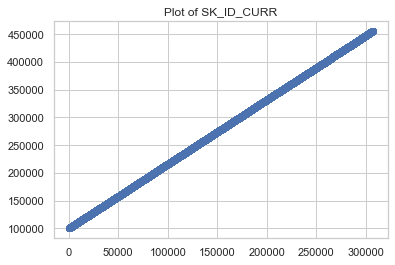

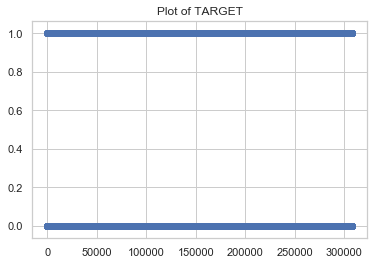

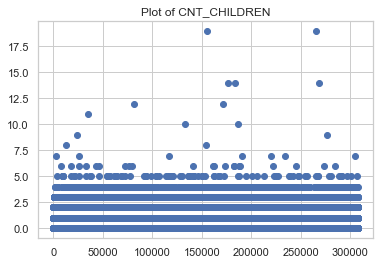

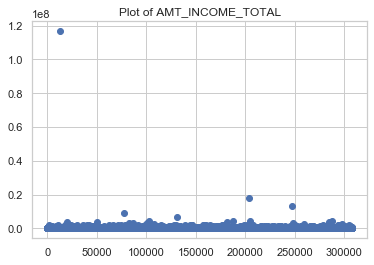

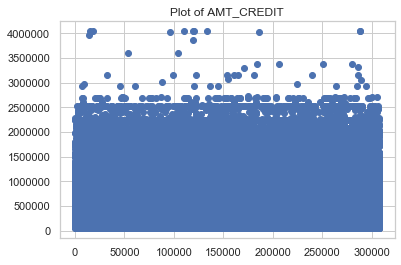

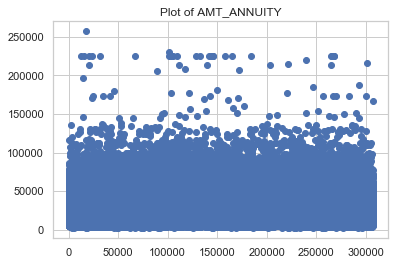

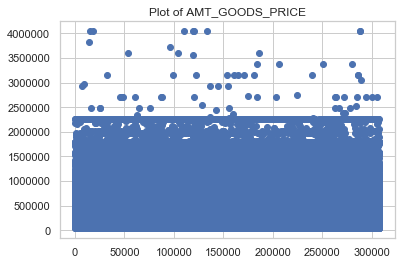

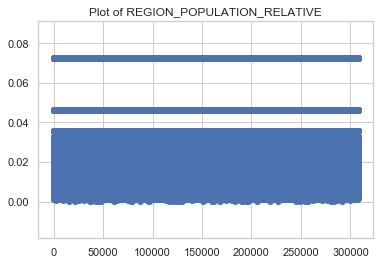

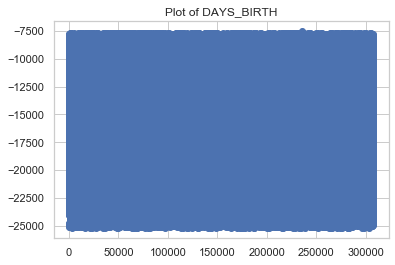

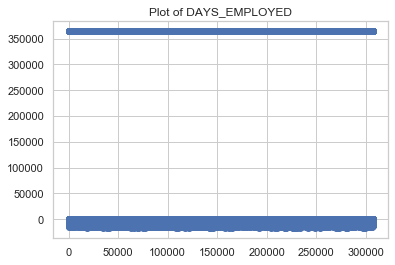

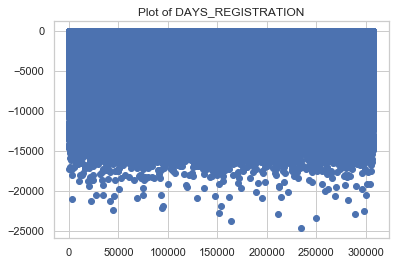

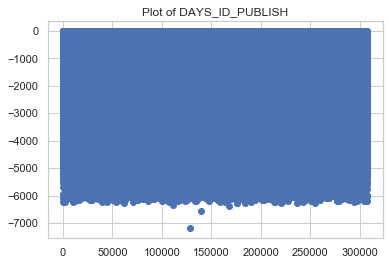

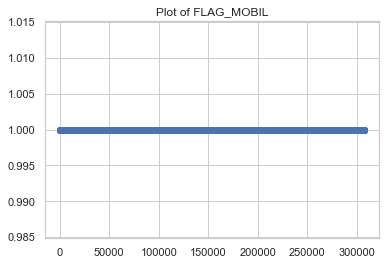

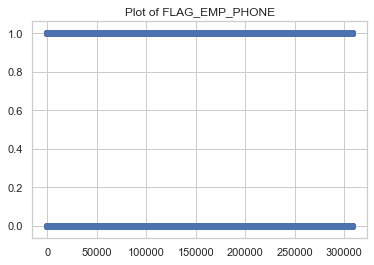

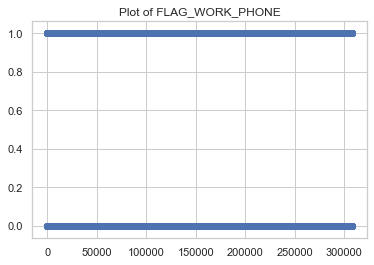

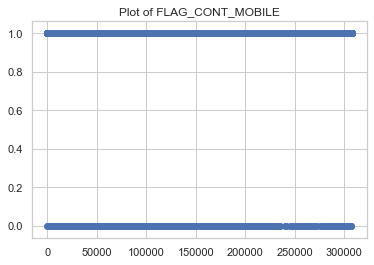

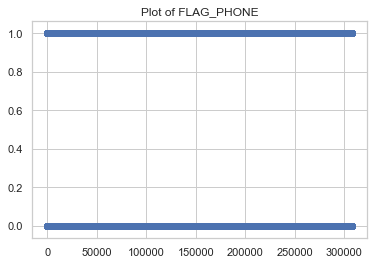

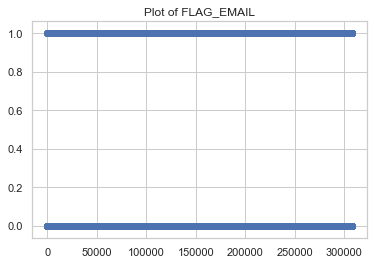

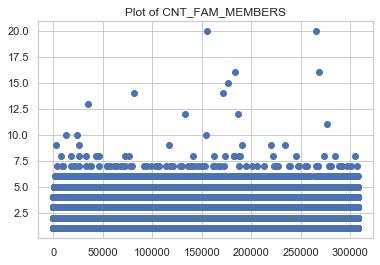

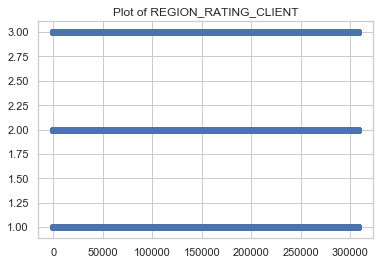

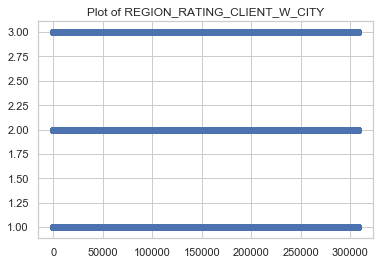

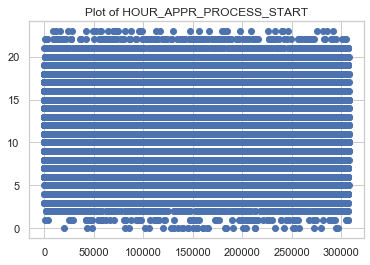

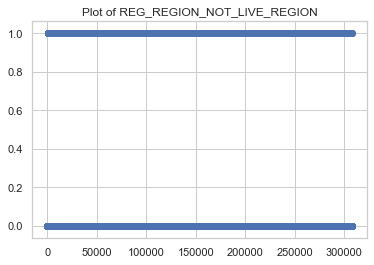

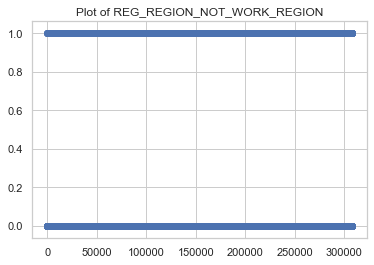

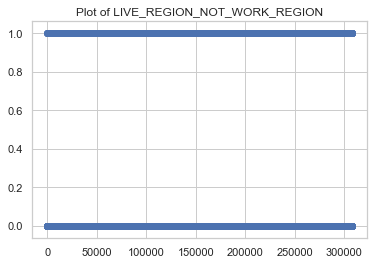

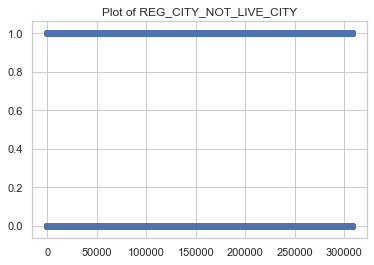

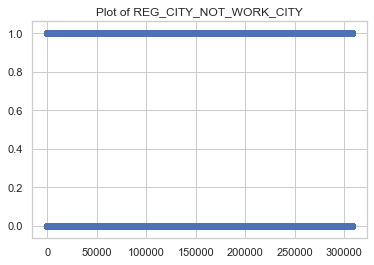

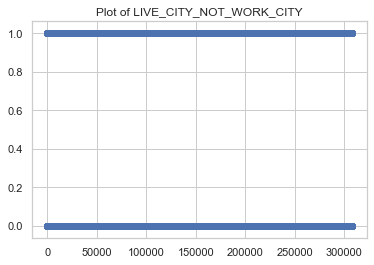

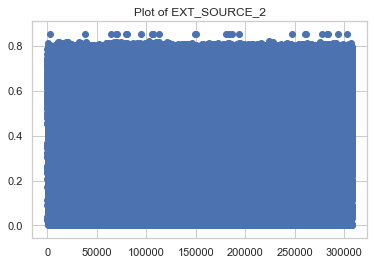

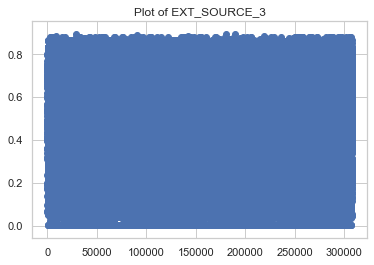

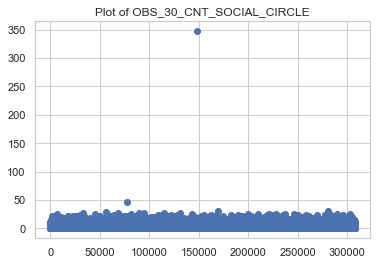

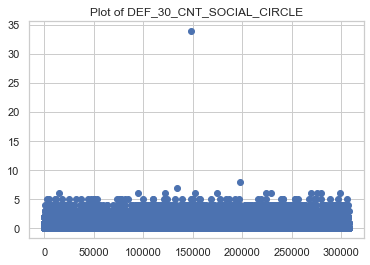

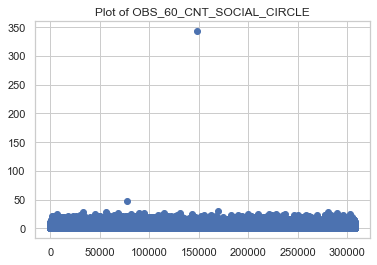

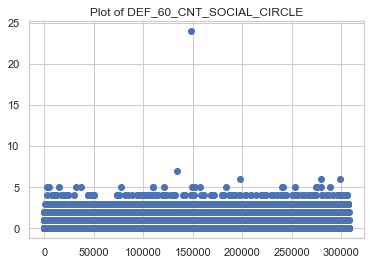

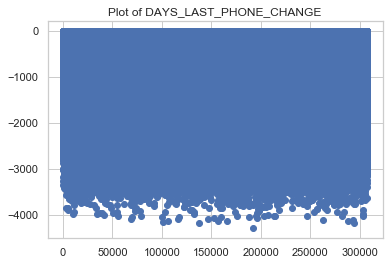

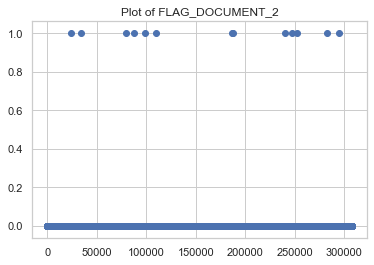

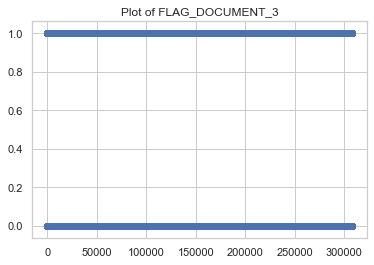

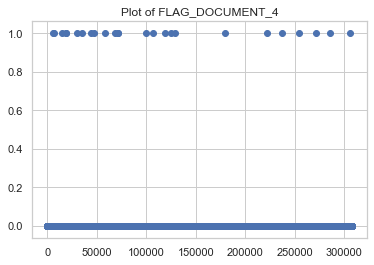

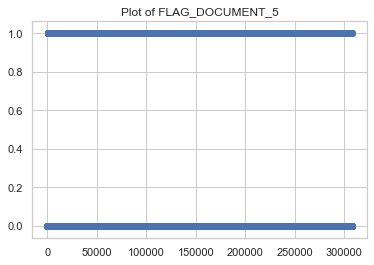

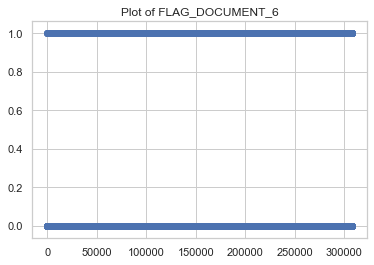

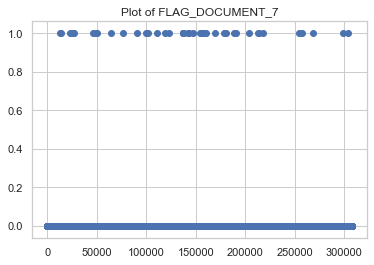

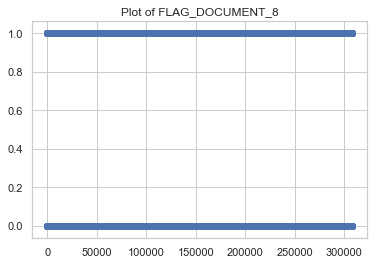

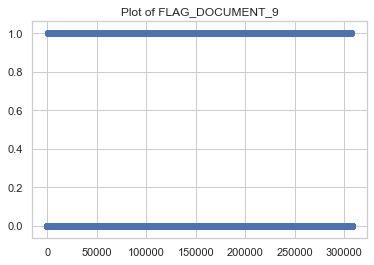

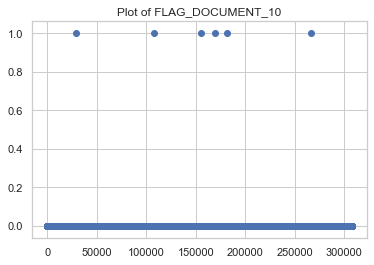

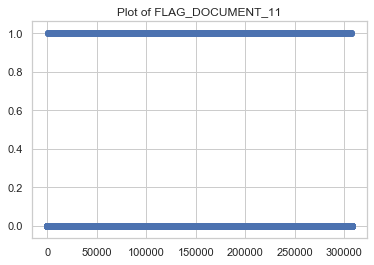

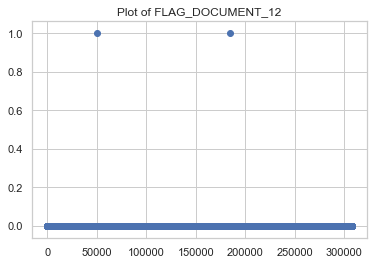

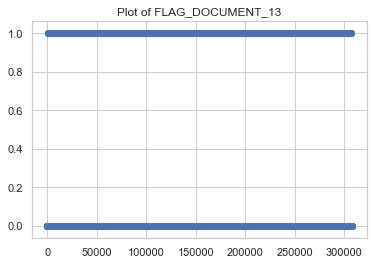

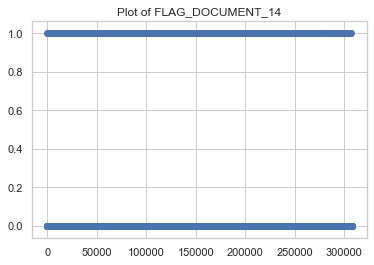

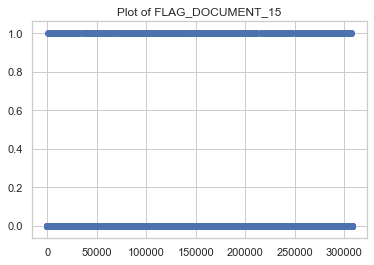

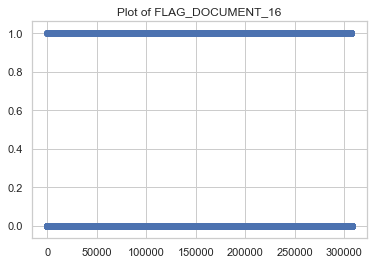

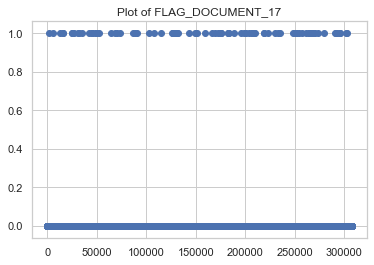

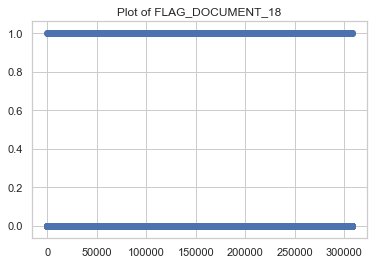

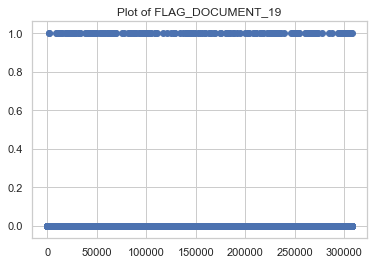

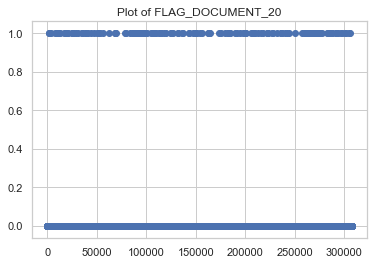

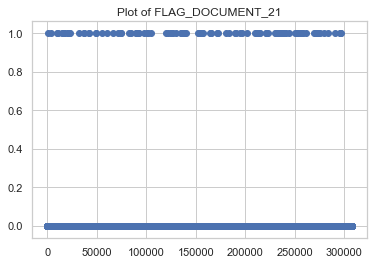

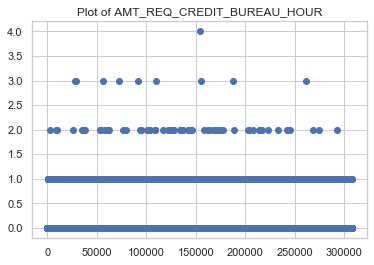

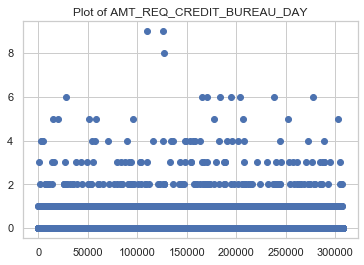

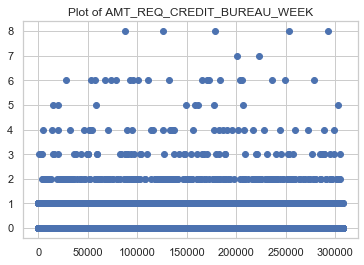

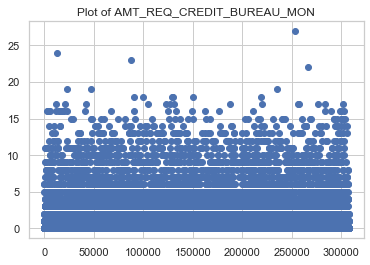

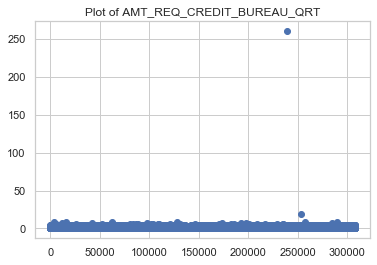

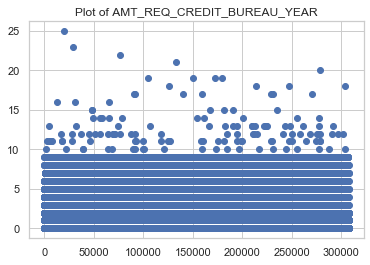

In [52]:
#loop to scatter plot values of numerical columns
for col in numerical_cols:
    sns.set_style('whitegrid')
    plt.scatter(app_data_df.index, app_data_df[col])
    plt.title("Plot of "+ col)
    plt.show();

### Treating Outliers and erroneous values observed in scatter plot above.

In [53]:
# Deleting outliers above 99% in AMT_INCOME_TOTAL column beacuse heavy outlier was leading to skewed analysis
app_data_df['AMT_INCOME_TOTAL'].quantile(0.99).round()

460124.0

In [55]:
#app_data_df[app_data_df['DEF_60_CNT_SOCIAL_CIRCLE'].sort_values().head()]

In [56]:
app_data_df.shape

(305545, 73)

In [57]:
# Deleting the outliers
app_data_df=app_data_df[~(app_data_df['AMT_INCOME_TOTAL'] > 460124.0)]

In [58]:
app_data_df.shape

(302489, 73)

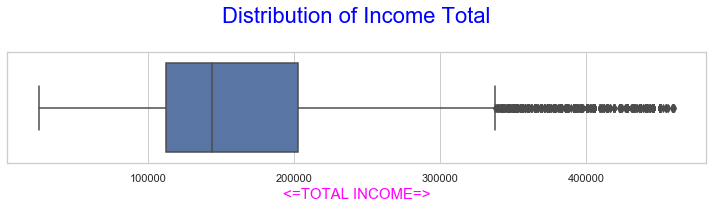

In [59]:
plt.figure(figsize=(10,3))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
sns.boxplot(app_data_df.AMT_INCOME_TOTAL)
plt.title('Distribution of Income Total',fontdict={'fontsize':22,'color':'Blue'})
plt.xlabel('<=TOTAL INCOME=>',fontdict={'fontsize':15,'color':'Magenta'})
plt.tight_layout()
plt.show()
# The boxplot after treating the outliers 99% and above.the plot ie now visible

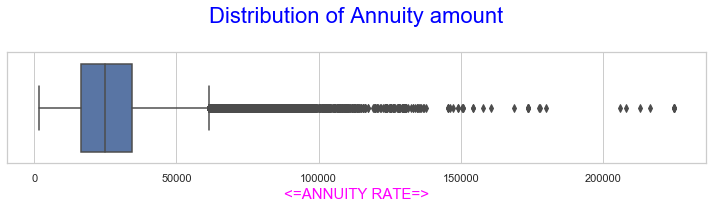

In [60]:
plt.figure(figsize=(10,3))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
sns.boxplot(app_data_df.AMT_ANNUITY)
plt.title('Distribution of Annuity amount',fontdict={'fontsize':22,'color':'Blue'})
plt.xlabel('<=ANNUITY RATE=>',fontdict={'fontsize':15,'color':'Magenta'})
plt.tight_layout()
plt.show()

In [61]:
len(app_data_df[(app_data_df['AMT_ANNUITY'] > 200000)])

9

In [62]:
# Handling Outliers above specific cutoff
app_data_df=app_data_df[~(app_data_df['AMT_ANNUITY'] > 200000)]

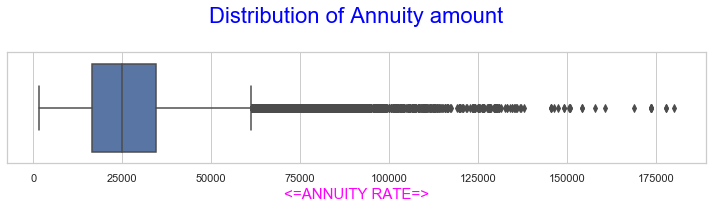

In [63]:
plt.figure(figsize=(10,3))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
sns.boxplot(app_data_df.AMT_ANNUITY)
plt.title('Distribution of Annuity amount',fontdict={'fontsize':22,'color':'Blue'})
plt.xlabel('<=ANNUITY RATE=>',fontdict={'fontsize':15,'color':'Magenta'})
plt.tight_layout()
plt.show()

In [64]:
app_data_df.shape

(302480, 73)

In [65]:
#handling the outlier in Employed Days

#app_data_df=app_data_df[~(app_data_df['DAYS_EMPLOYED'] > 350000)]
app_data_df[(app_data_df['DAYS_EMPLOYED'] > 350000)]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
8           100011       0         Cash loans           F            N               Y             0        112500.000   1019610.0      33826.5         913500.0        Children        Pensioner  Secondary / secondary special               Married  House / apartment                    0.018634      -20099         365243              -7427            -3514           1               0                0                 1           0           0          Others                2   
11          100015       0         Cash loans           F            N               Y             0         38419.155    148365.0      10678.5         135000.0        Children        Pensioner  Secondary / secondary special               Married  House / apartment                    0.015221      -20417         365243              -5246            -2512           1               0                0                 1           1           0          Others                2   
23          100027       0         Cash loans           F            N               Y             0         83250.000    239850.0      23850.0         225000.0   Unaccompanied        Pensioner  Secondary / secondary special               Married  House / apartment                    0.006296      -24827         365243              -9012            -3684           1               0                0                 1           1           0          Others                2   
38          100045       0         Cash loans           F            N               Y             0         99000.000    247275.0      17338.5         225000.0   Unaccompanied        Pensioner  Secondary / secondary special               Married  House / apartment                    0.006207      -23920         365243              -9817            -4969           1               0                0                 1           1           0          Others                2   
43          100050       0         Cash loans           F            N               Y             0        108000.000    746280.0      42970.5         675000.0   Unaccompanied        Pensioner               Higher education  Single / not married  House / apartment                    0.010966      -23548         365243              -5745            -4576           1               0                0                 1           0           0          Others                1   
...            ...     ...                ...         ...          ...             ...           ...               ...         ...          ...              ...             ...              ...                            ...                   ...                ...                         ...         ...            ...                ...              ...         ...             ...              ...               ...         ...         ...             ...              ...   
307469      456209       0         Cash loans           F            N               Y             0        202500.000    703728.0      29943.0         607500.0   Unaccompanied        Pensioner  Secondary / secondary special  Single / not married  House / apartment                    0.031329      -22414         365243             -11976            -4171           1               0                0                 1           0           0          Others                1   
307483      456227       0         Cash loans           F            N               Y             0         99000.000    247275.0      16479.0         225000.0   Unacc

In [66]:


#since the data is on pensioner and data is huge they cannot be removed and have maximum value.
# we can replace it with median
median = int(app_data_df['DAYS_EMPLOYED'].median())
median
app_data_df['DAYS_EMPLOYED'] = np.where(app_data_df['DAYS_EMPLOYED'] >350000, median,app_data_df['DAYS_EMPLOYED'])


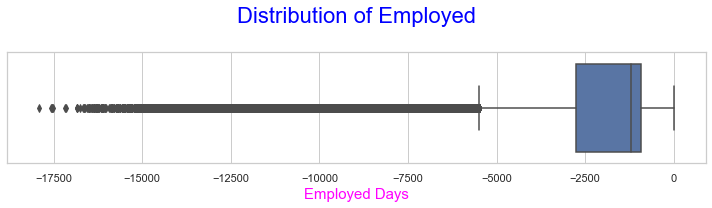

In [67]:
plt.figure(figsize=(10,3))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
sns.boxplot(app_data_df.DAYS_EMPLOYED)  
plt.title('Distribution of Employed',fontdict={'fontsize':22,'color':'Blue'})
plt.xlabel('Employed Days',fontdict={'fontsize':15,'color':'Magenta'})
plt.tight_layout()
plt.show()

In [68]:
app_data_df.DAYS_EMPLOYED.head()

0    -637
1   -1188
2    -225
3   -3039
4   -3038
Name: DAYS_EMPLOYED, dtype: int64

In [69]:
# Treating the days employed converting it to positive
app_data_df['DAYS_EMPLOYED']=(app_data_df['DAYS_EMPLOYED'])*(-1)

In [70]:
app_data_df.DAYS_EMPLOYED.head()

0     637
1    1188
2     225
3    3039
4    3038
Name: DAYS_EMPLOYED, dtype: int64

In [71]:
app_data_df['AMT_INCOME_TOTAL'].describe()

count    302480.000000
mean     162877.297320
std       77370.214945
min       25650.000000
25%      112500.000000
50%      144000.000000
75%      202500.000000
max      459751.500000
Name: AMT_INCOME_TOTAL, dtype: float64

In [72]:
app_data_df['EXT_SOURCE_2'].describe()

count    3.024800e+05
mean     5.133510e-01
std      1.911486e-01
min      8.173617e-08
25%      3.907902e-01
50%      5.648061e-01
75%      6.627831e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [73]:
app_data_df.loc[:,'INCOME_RANGE']=pd.qcut(app_data_df.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.20,0.50,0.90,1],
labels=['Low','Medium','High','Very_high'])

In [74]:
app_data_df['INCOME_RANGE'].value_counts(ascending=False)

High         126024
Medium        89395
Low           63198
Very_high     23863
Name: INCOME_RANGE, dtype: int64

In [75]:
# Days Birth is in negative so converting it into proper format 
app_data_df['DAYS_BIRTH'].head(43)
app_data_df['DAYS_BIRTH'] =app_data_df['DAYS_BIRTH']*(-1)

In [76]:
# creating age column for reference purpose
app_data_df['AGE'] =app_data_df['DAYS_BIRTH']//365

In [77]:
#Grouping Age 
app_data_df['AGE_GROUP']=pd.cut(app_data_df.AGE,bins=np.linspace(20 ,70,num=11))

In [78]:
app_data_df['AGE_GROUP'].value_counts(ascending=False)

(35.0, 40.0]    42845
(40.0, 45.0]    39158
(30.0, 35.0]    38743
(25.0, 30.0]    35977
(50.0, 55.0]    34527
(45.0, 50.0]    33768
(55.0, 60.0]    32280
(60.0, 65.0]    24087
(20.0, 25.0]    16099
(65.0, 70.0]     4995
Name: AGE_GROUP, dtype: int64

In [79]:
#DATA IMBALANCE RATIO 
target0 = app_data_df[app_data_df["TARGET"]==0]
target1 = app_data_df[app_data_df["TARGET"]==1]

In [80]:
#Imbalanbce Ratio
len(target0)/len(target1)

11.323989569752282

In [81]:
app_data_df.TARGET.value_counts()

0    277936
1     24544
Name: TARGET, dtype: int64

In [82]:
app_data_df.shape

(302480, 76)

In [83]:
app_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302480 entries, 0 to 307510
Data columns (total 76 columns):
SK_ID_CURR                     302480 non-null int64
TARGET                         302480 non-null int64
NAME_CONTRACT_TYPE             302480 non-null object
CODE_GENDER                    302480 non-null object
FLAG_OWN_CAR                   302480 non-null object
FLAG_OWN_REALTY                302480 non-null object
CNT_CHILDREN                   302480 non-null int64
AMT_INCOME_TOTAL               302480 non-null float64
AMT_CREDIT                     302480 non-null float64
AMT_ANNUITY                    302480 non-null float64
AMT_GOODS_PRICE                302480 non-null float64
NAME_TYPE_SUITE                302480 non-null object
NAME_INCOME_TYPE               302480 non-null object
NAME_EDUCATION_TYPE            302480 non-null object
NAME_FAMILY_STATUS             302480 non-null object
NAME_HOUSING_TYPE              302480 non-null object
REGION_POPULATION_RELATI

# Univariate Analysis of the categorical data

In [84]:
# Plotting some analysis on Target points 


def plotting(train,target0,target1,column):
    
    train=train
    target0=target0
    target1=target1
    col=column
    
    fig=plt.figure(figsize=(15,10))
    
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = '%1.0f%%', ax=ax1)
    ax1.set_ylabel('')
    plt.title('Plotting Data For Column=> '+ column, fontdict={'fontsize':15})
    
    
    ax2 = plt.subplot(222)
    sns.countplot(x=column , hue='TARGET', data=train , ax=ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting Data For Target In Terms Of Total Count', fontdict={'fontsize':15})
    
    ax3 = plt.subplot(223)
    df=pd.DataFrame()
    df['0']=((target0[col].value_counts())/len(target0))
    df['1']=((target1[col].value_counts())/len(target1))
    df.plot.bar(ax=ax3)
    plt.xticks(rotation=90)
    plt.title('Plotting Data For Target In Terms Of Percentage', fontdict={'fontsize':15})
    
    
    fig.tight_layout()
    plt.show()

Plotting NAME_CONTRACT_TYPE


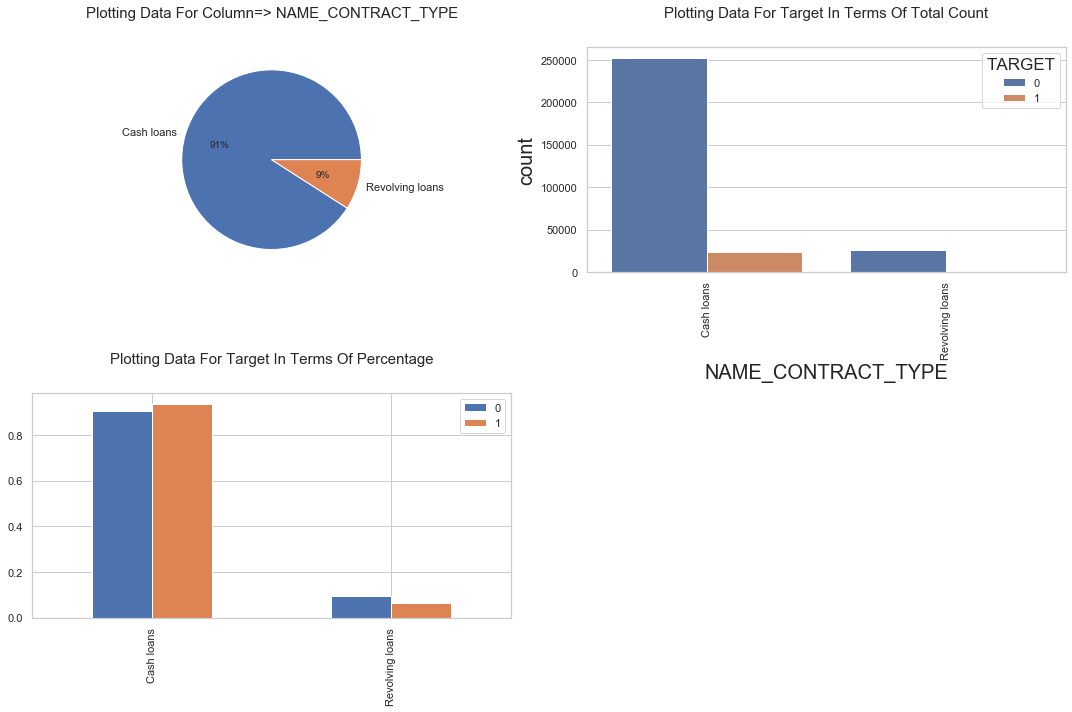

Plotting CODE_GENDER


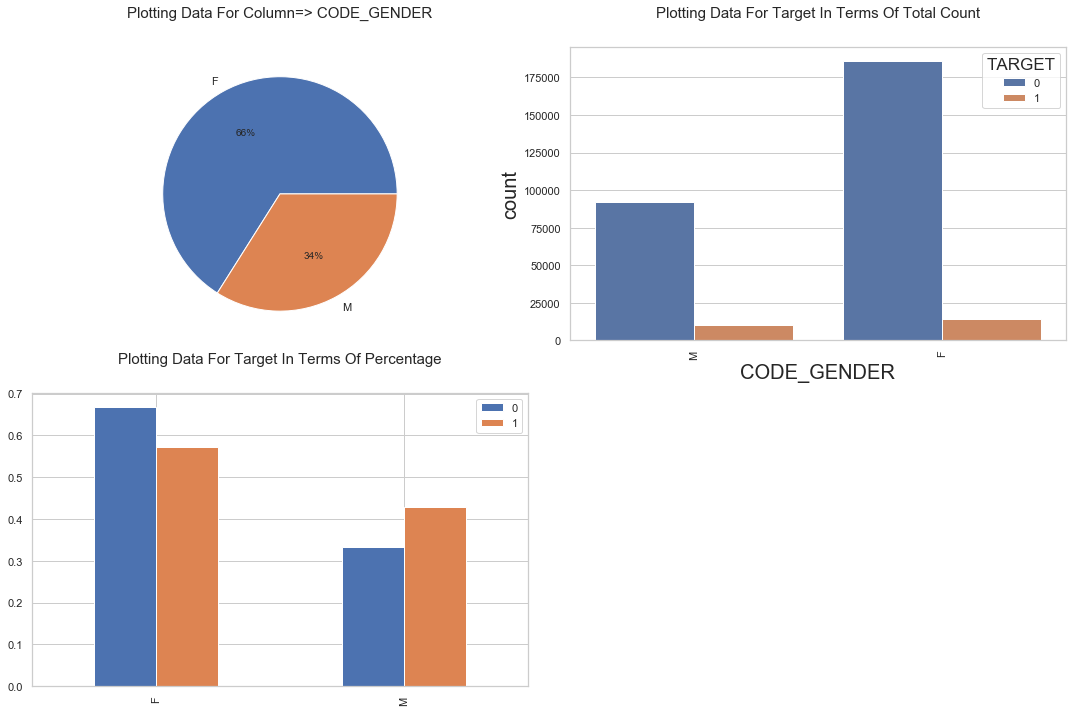

Plotting FLAG_OWN_CAR


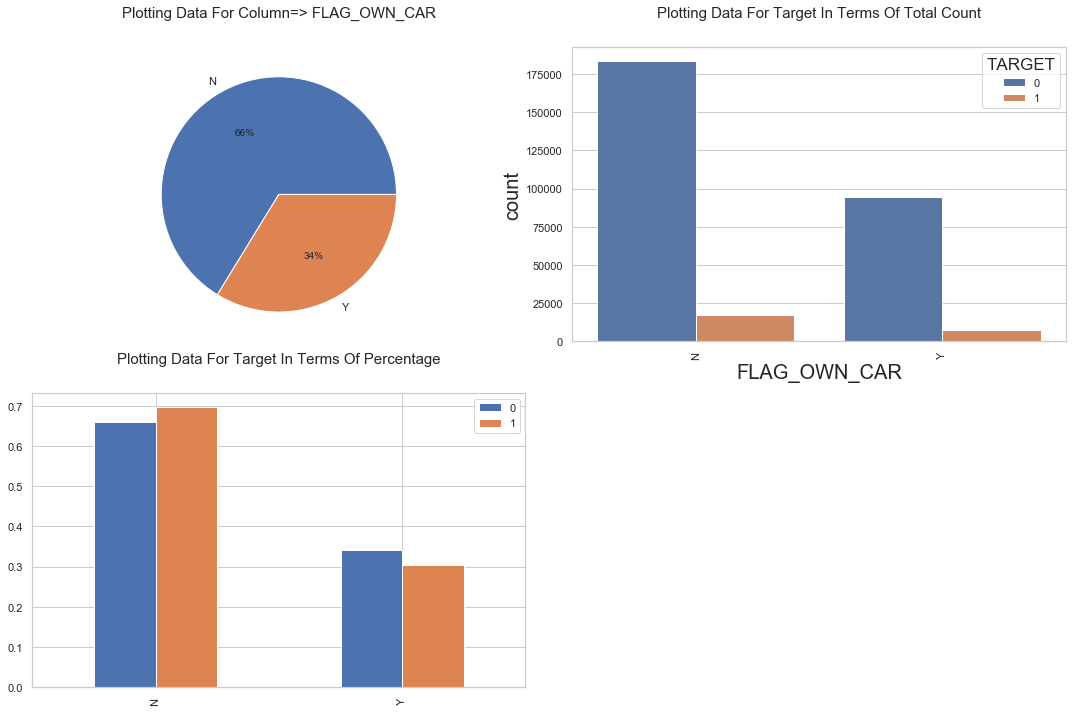

Plotting FLAG_OWN_REALTY


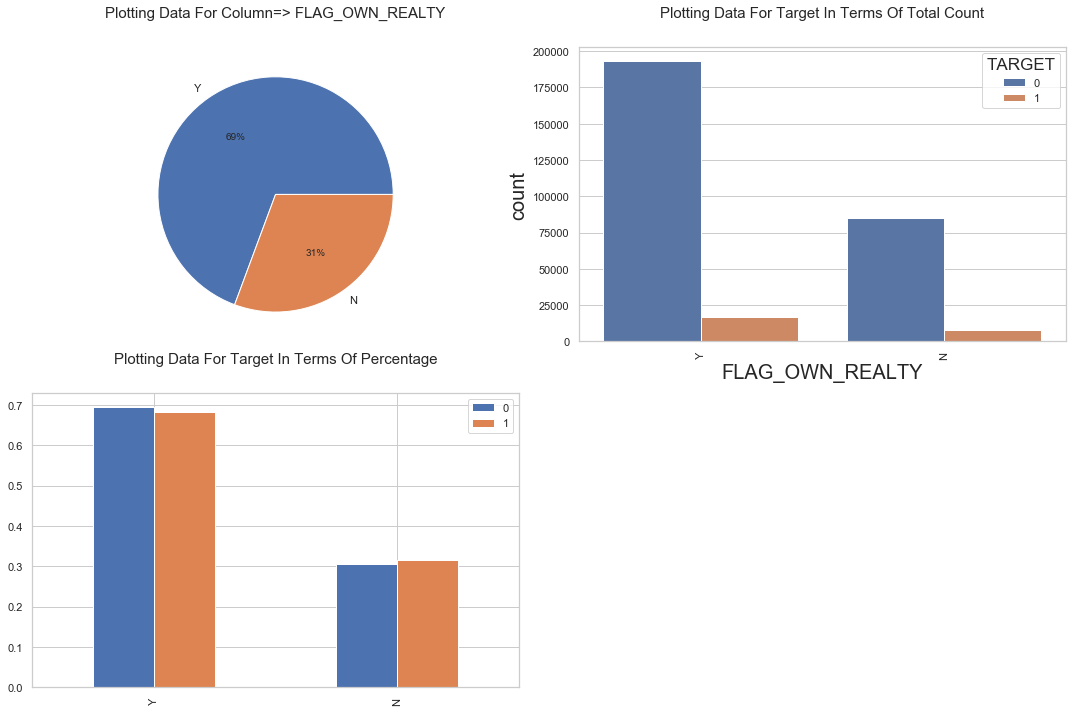

Plotting NAME_TYPE_SUITE


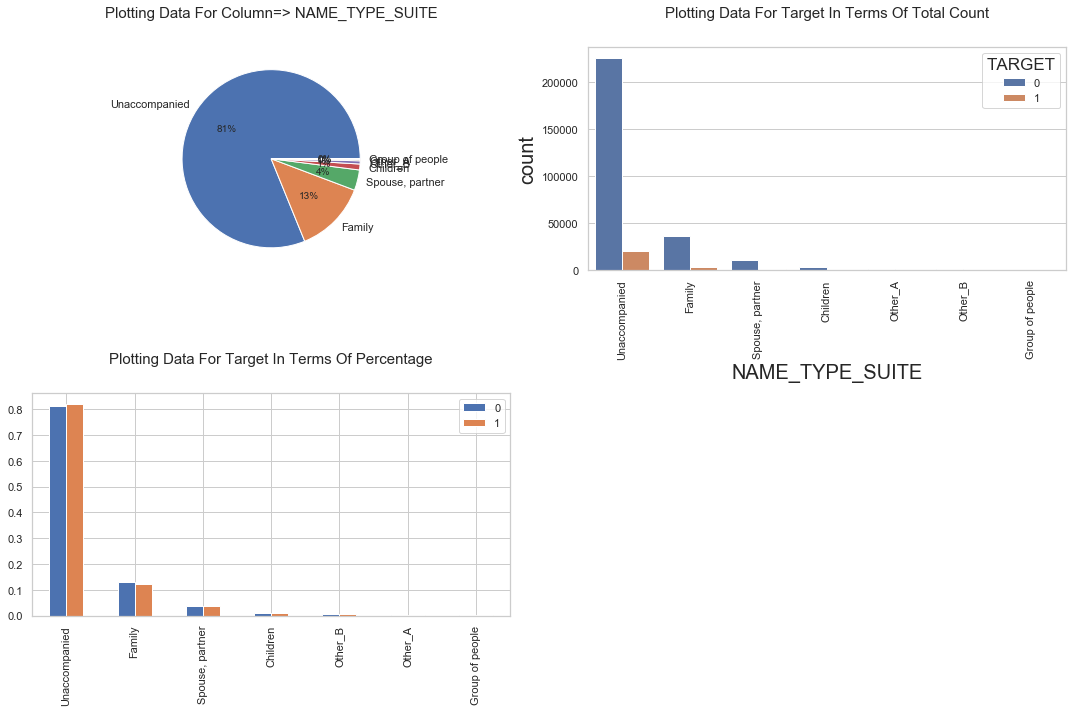

Plotting NAME_INCOME_TYPE


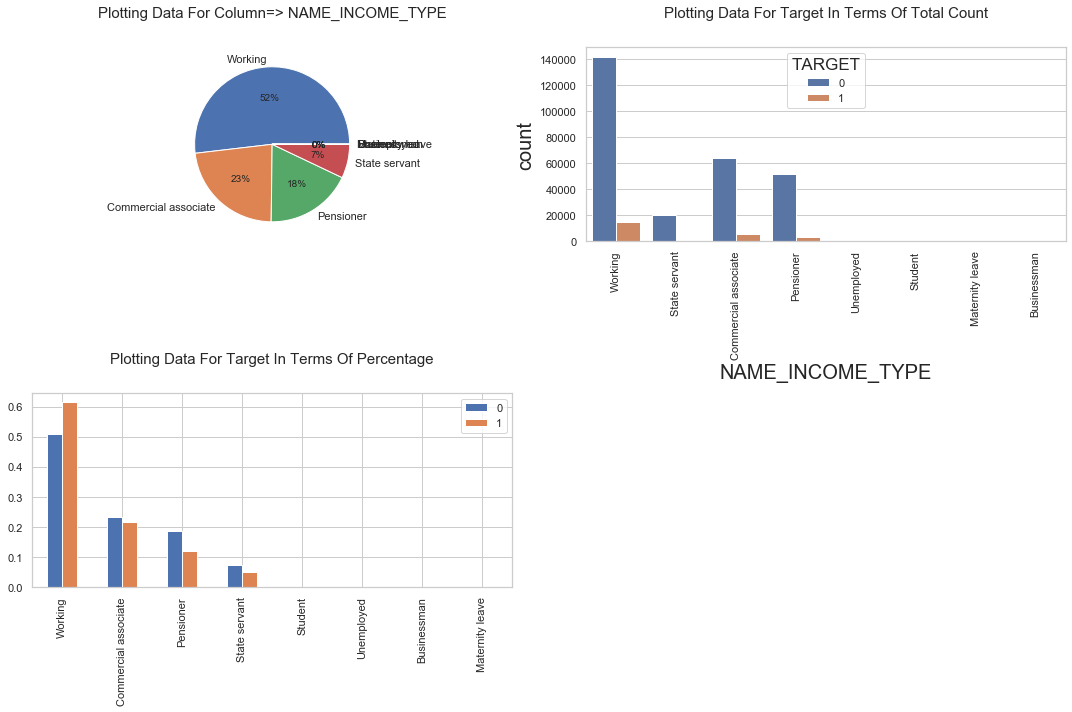

Plotting NAME_EDUCATION_TYPE


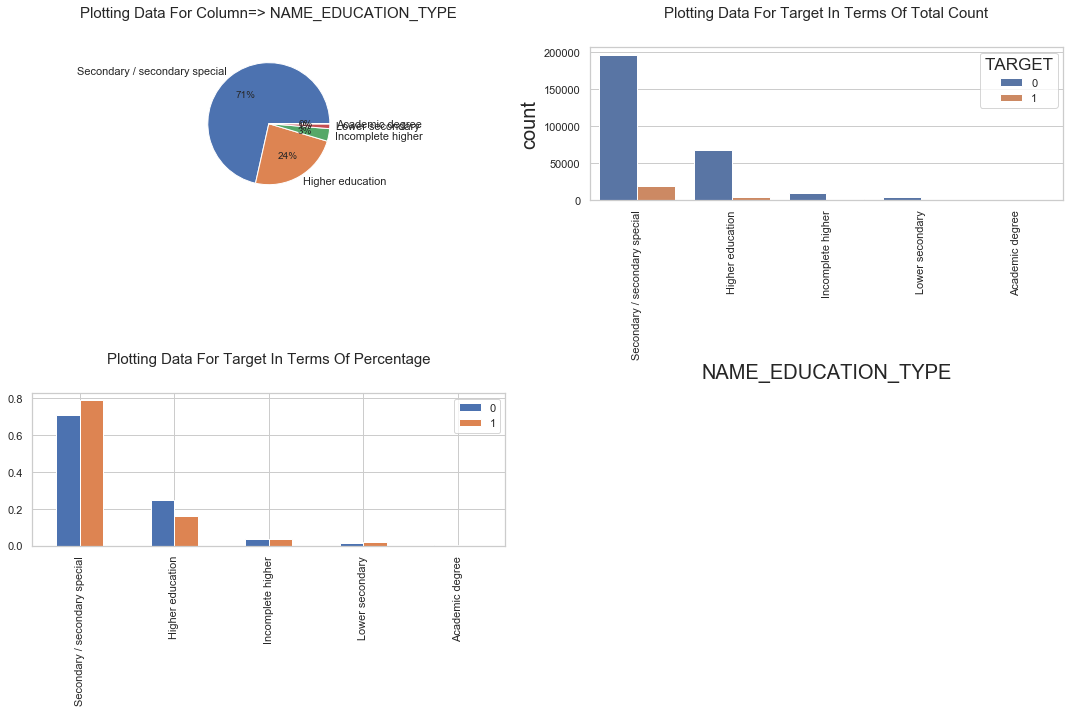

Plotting NAME_FAMILY_STATUS


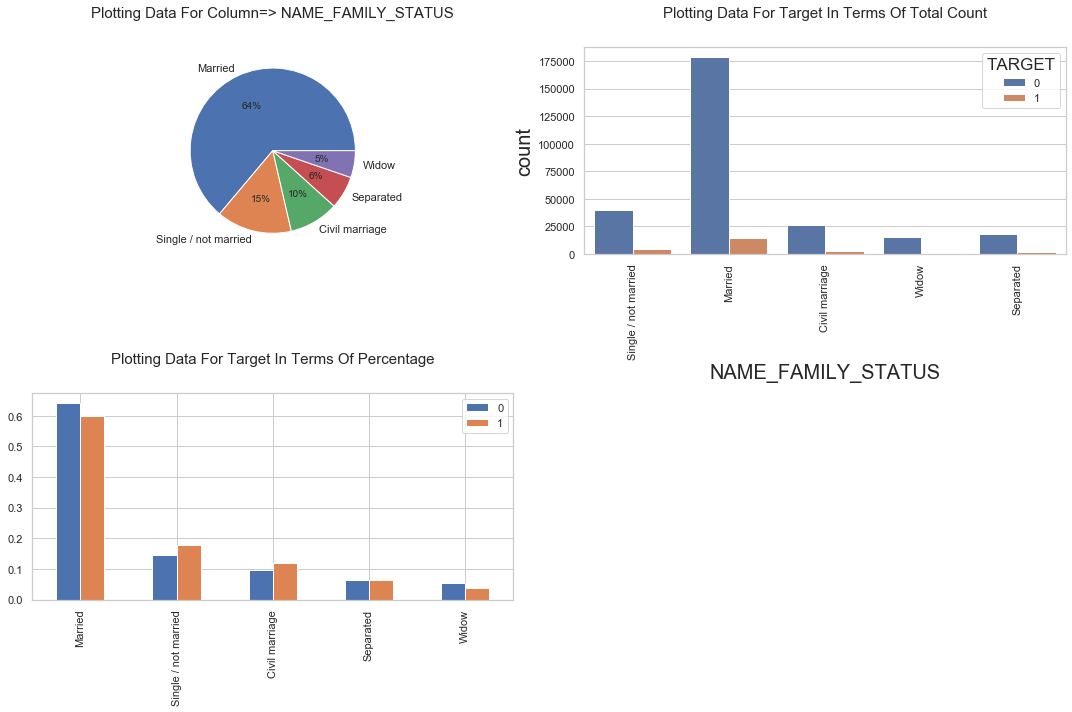

Plotting NAME_HOUSING_TYPE


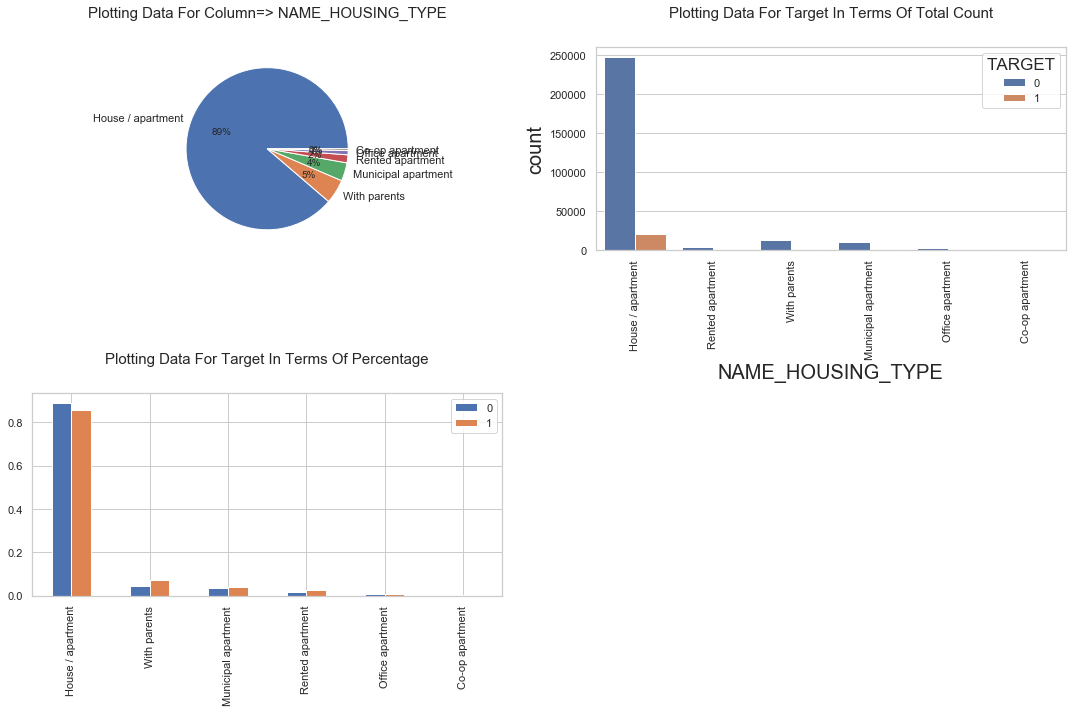

Plotting OCCUPATION_TYPE


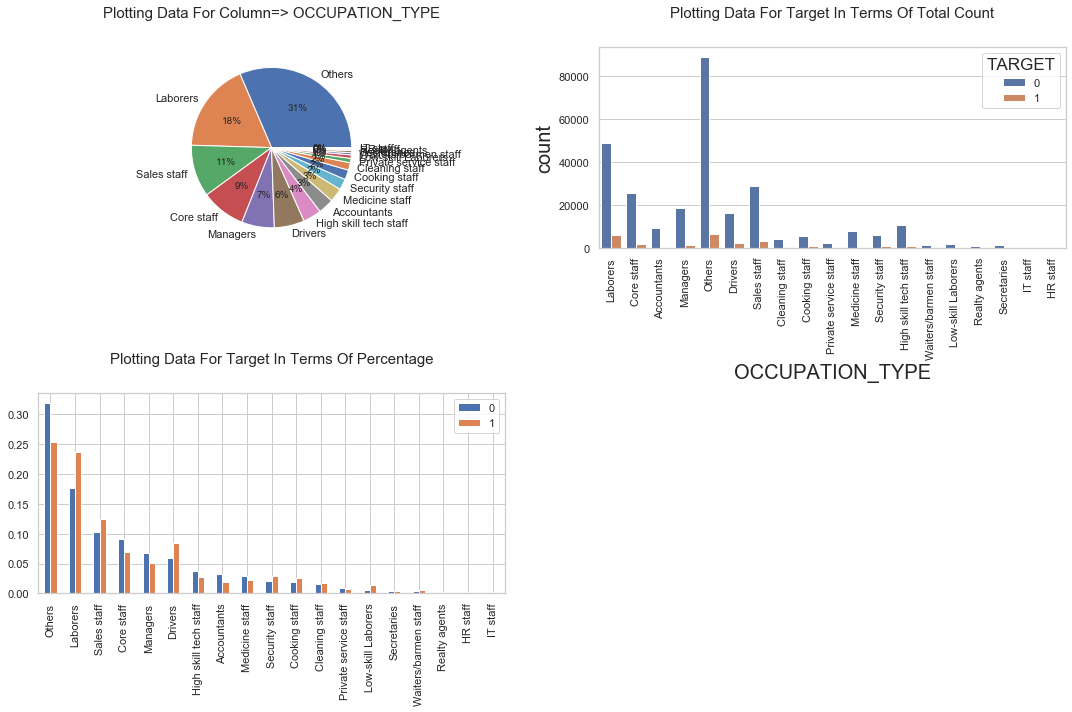

Plotting WEEKDAY_APPR_PROCESS_START


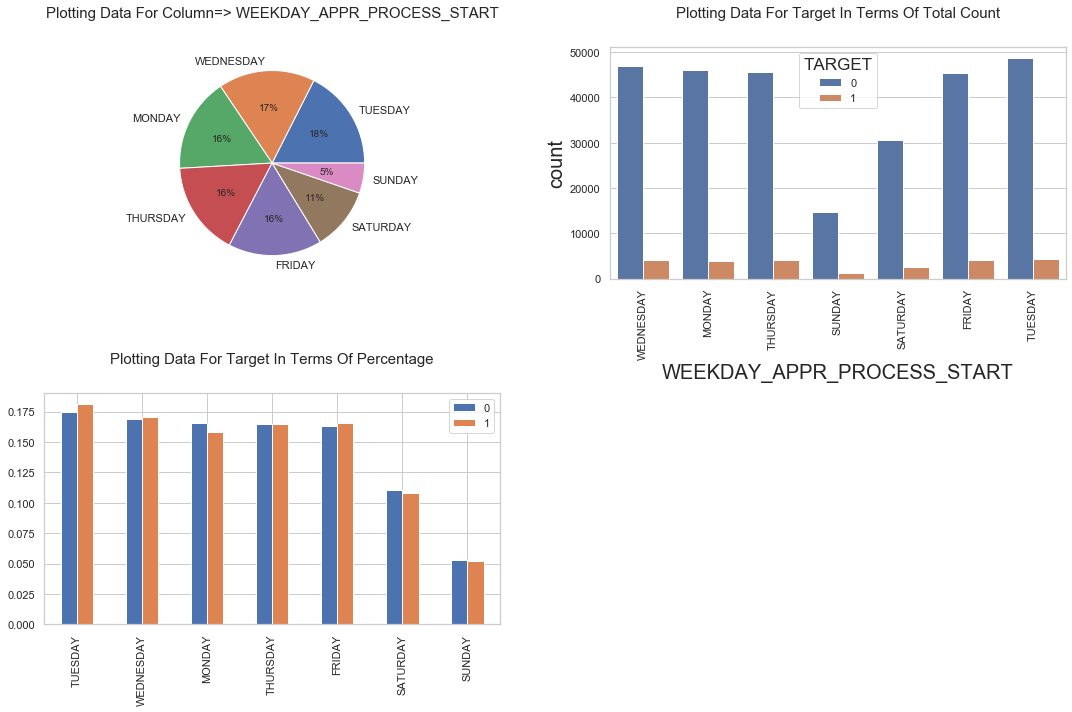

Plotting ORGANIZATION_TYPE


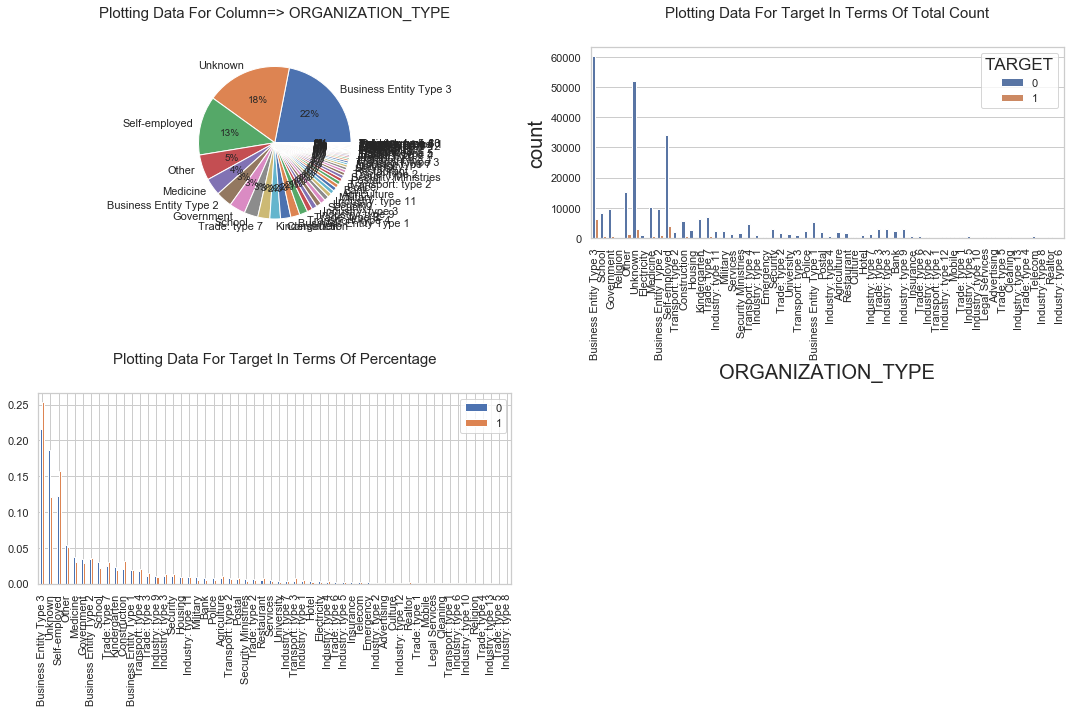

In [85]:
for column in train_categorical:
    print('Plotting',column)
    plotting(app_data_df,target0,target1,column)

## Correlation Matrix Analysis on the Data based on Target variable.

In [86]:
Flag_document_remove=[ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [87]:
df_1=app_data_df.drop(columns= ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'])
#df_1=app_data_df

In [88]:
target_0 = df_1[app_data_df["TARGET"]==0]
target_1 = df_1[app_data_df["TARGET"]==1]

In [89]:
target0_corr=target_0.iloc[0:,2:]
target1_corr=target_1.iloc[0:,2:]

In [90]:
target0_corr

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
1              Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0           Family         State servant               Higher education               Married  House / apartment                    0.003541       16765           1188              -1186             -291           1               1                0                 1           1           0      Core staff                2                     1   
2         Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0    Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032       19046            225              -4260            -2531           1               1                1                 1           1           0        Laborers                1                     2   
3              Cash loans           F            N               Y             0          135000.0    312682.5      29686.5         297000.0    Unaccompanied               Working  Secondary / secondary special        Civil marriage  House / apartment                    0.008019       19005           3039              -9833            -2437           1               1                0                 1           0           0        Laborers                2                     2   
4              Cash loans           M            N               Y             0          121500.0    513000.0      21865.5         513000.0    Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.028663       19932           3038              -4311            -3458           1               1                0                 1           0           0      Core staff                1                     2   
5              Cash loans           M            N               Y             0           99000.0    490495.5      27517.5         454500.0  Spouse, partner         State servant  Secondary / secondary special               Married  House / apartment                    0.035792       16941           1588              -4970             -477           1               1                1                 1           1           0        Laborers                2                     2   
...                   ...         ...          ...             ...           ...               ...         ...          ...              ...              ...                   ...                            ...                   ...                ...                         ...         ...            ...                ...              ...         ...             ...              ...               ...         ...         ...             ...              ...                   ...   
307505         Cash loans           F            N               Y             0          112500.0    225000.0      22050.0         225000.0    Unaccompanied             Pensioner  Secondary / secondary special  Single / not married  House / apartment                    0.022800       24384           1208              -7369            -2357           1               0                0                 1           1           0          Others                1                     2   
307506         Cash loans           M            N               N             0          157500.0    2

In [129]:
target_0=target0_corr.corr()
target_1=target1_corr.corr()

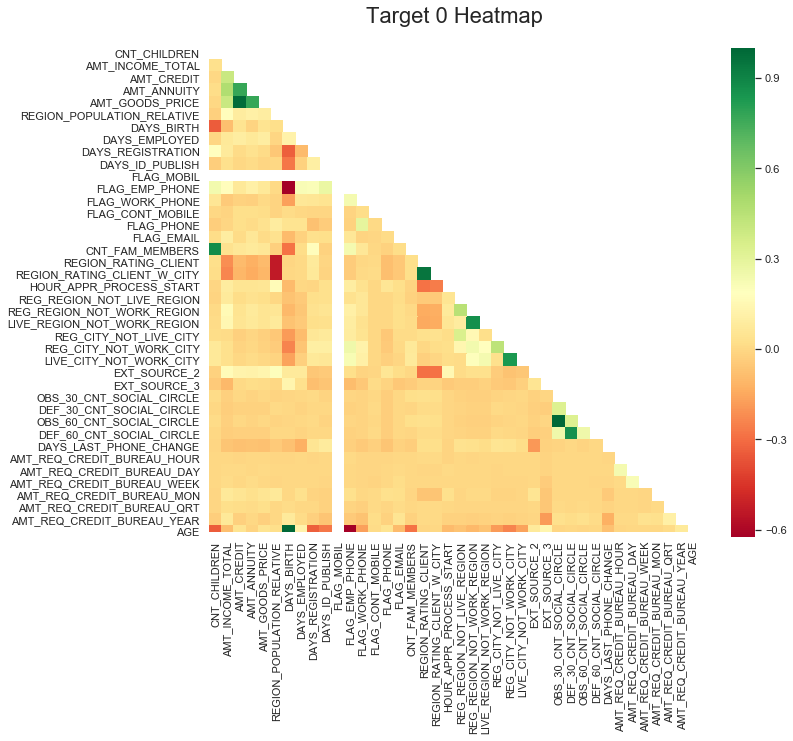

In [132]:
mask0 = np.zeros_like(target_0)
mask0[np.triu_indices_from(mask0)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(target_0, mask=mask0, vmax=1, square=True, cmap="RdYlGn")
    plt.title('Target 0 Heatmap')
    plt.savefig('Target0_Heatmap.png', dpi=300, bbox_inches='tight')
    

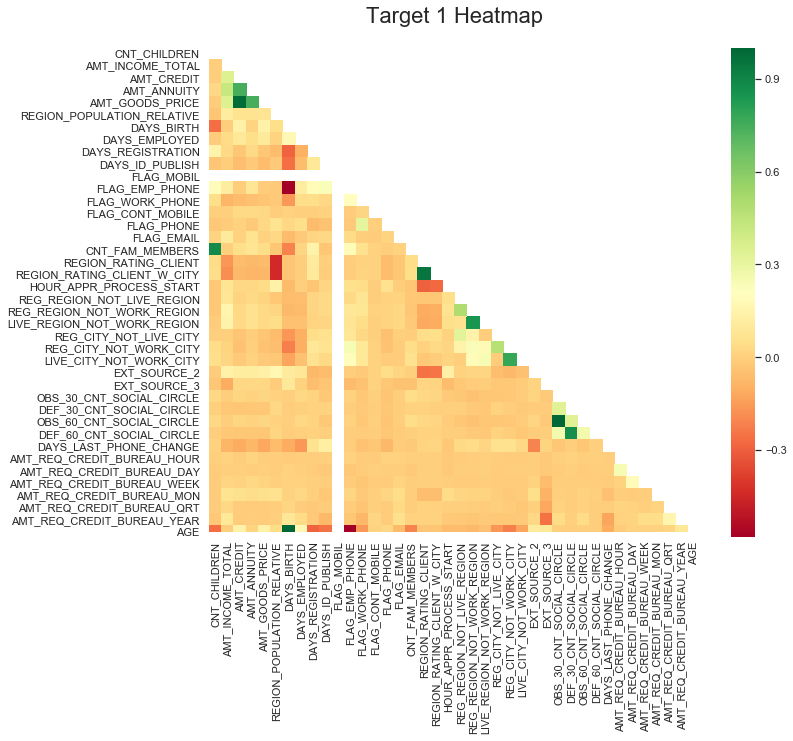

In [133]:
mask1 = np.zeros_like(target_1)
mask1[np.triu_indices_from(mask1)] = True
f1, ax1 = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax1 = sns.heatmap(target_1, mask=mask1, vmax=1, square=True, cmap="RdYlGn")
    plt.title('Target 1 Heatmap')
    plt.savefig('Target1_Heatmap.png', dpi=300, bbox_inches='tight')

Inferences :
1) 

# Finding the top-10 correlations for Non-Defaulters

In [94]:
target_0.corr()
target_0.corr().abs()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
CNT_CHILDREN                     1.000000          0.038393    0.048071     0.006293         0.050569                    0.089325    0.608567       0.075358           0.462368         0.106974         NaN        0.522563         0.185574          0.044975    0.111014    0.060730         0.988837              0.049032                     0.047954                 0.000060                    0.030439                    0.014050                     0.021246                0.102074   
AMT_INCOME_TOTAL                 0.038393          1.000000    0.699068     0.772614         0.700497                    0.433472    0.164871       0.101963           0.096454         0.071896         NaN        0.279945         0.082842          0.065964    0.006025    0.174396         0.067493              0.499777                     0.515103                 0.280346                    0.119892                    0.259548                     0.267002                0.023201   
AMT_CREDIT                       0.048071          0.699068    1.000000     0.964660         0.999754                    0.246614    0.060125       0.160664           0.045700         0.056914         NaN        0.060760         0.111394          0.012481    0.025481    0.016382         0.021879              0.277535                     0.292356                 0.125021                    0.029039                    0.025490                     0.047252                0.145135   
AMT_ANNUITY                      0.006293          0.772614    0.964660     1.000000         0.965071                    0.285050    0.020775       0.131291           0.007837         0.012503         NaN        0.133600         0.102725          0.017978    0.006565    0.080873         0.057787              0.326872                     0.342704                 0.153385                    0.006916                    0.077886                     0.094979                0.106653   
AMT_GOODS_PRICE                  0.050569          0.700497    0.999754     0.965071         1.000000                    0.250022    0.058590       0.161276           0.045716         0.058125         NaN        0.062179         0.097219          0.014723    0.038621    0.016159         0.019441              0.281102                     0.295810                 0.131724                    0.027819                    0.025803                     0.047116                0.145914   
REGION_POPULATION_RELATIVE       0.089325          0.433472    0.246614     0.285050         0.250022                    1.000000    0.059315       0.016516           0.162237         0.027808         NaN        0.007219         0.046134          0.035753    0.204899    0.101168         0.084093              0.863394                     0.864755                 0.462424                    0.028001                    0.160431                     0.196255                0.135017   
DAYS_BIRTH                       0.608567          0.164871    0.060125     0.020775         0.058590                    0.059315    1.000000       0.193220           0.671566         0.562631         NaN        0.898084         0.404017          0.043632    0.103282    0.196515         0.568126              0.002323                     0.003828                 0.183131                    0.194774                    0.244814                     0.202066                0.403196   
DAYS_EMPLOYED                    0.075358          0.101963    0.160664     0.131291         0.161276                    0.016516    0.193220       1

In [95]:
correlation_0=target_0.corr().abs().unstack().sort_values(kind='quicksort').dropna()
correlation_0

CNT_CHILDREN                 HOUR_APPR_PROCESS_START        0.000060
HOUR_APPR_PROCESS_START      CNT_CHILDREN                   0.000060
AMT_REQ_CREDIT_BUREAU_WEEK   REGION_RATING_CLIENT_W_CITY    0.000310
REGION_RATING_CLIENT_W_CITY  AMT_REQ_CREDIT_BUREAU_WEEK     0.000310
DEF_60_CNT_SOCIAL_CIRCLE     DAYS_LAST_PHONE_CHANGE         0.001145
                                                              ...   
REG_CITY_NOT_WORK_CITY       REG_CITY_NOT_WORK_CITY         1.000000
REG_CITY_NOT_LIVE_CITY       REG_CITY_NOT_LIVE_CITY         1.000000
LIVE_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    1.000000
HOUR_APPR_PROCESS_START      HOUR_APPR_PROCESS_START        1.000000
AGE                          AGE                            1.000000
Length: 1521, dtype: float64

In [96]:
correlation_0 = correlation_0[ correlation_0 != 1.0 ]
correlation_0

CNT_CHILDREN                 HOUR_APPR_PROCESS_START        0.000060
HOUR_APPR_PROCESS_START      CNT_CHILDREN                   0.000060
AMT_REQ_CREDIT_BUREAU_WEEK   REGION_RATING_CLIENT_W_CITY    0.000310
REGION_RATING_CLIENT_W_CITY  AMT_REQ_CREDIT_BUREAU_WEEK     0.000310
DEF_60_CNT_SOCIAL_CIRCLE     DAYS_LAST_PHONE_CHANGE         0.001145
                                                              ...   
AMT_GOODS_PRICE              AMT_CREDIT                     0.999754
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.999996
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.999996
DAYS_BIRTH                   AGE                            1.000000
AGE                          DAYS_BIRTH                     1.000000
Length: 1482, dtype: float64

In [97]:
correlation_0.tail(10)

CNT_CHILDREN                 CNT_FAM_MEMBERS                0.988837
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.988837
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.998551
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.998551
AMT_CREDIT                   AMT_GOODS_PRICE                0.999754
AMT_GOODS_PRICE              AMT_CREDIT                     0.999754
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.999996
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.999996
DAYS_BIRTH                   AGE                            1.000000
AGE                          DAYS_BIRTH                     1.000000
dtype: float64

In [98]:
correlation_0.head(10)

CNT_CHILDREN                 HOUR_APPR_PROCESS_START        0.000060
HOUR_APPR_PROCESS_START      CNT_CHILDREN                   0.000060
AMT_REQ_CREDIT_BUREAU_WEEK   REGION_RATING_CLIENT_W_CITY    0.000310
REGION_RATING_CLIENT_W_CITY  AMT_REQ_CREDIT_BUREAU_WEEK     0.000310
DEF_60_CNT_SOCIAL_CIRCLE     DAYS_LAST_PHONE_CHANGE         0.001145
DAYS_LAST_PHONE_CHANGE       DEF_60_CNT_SOCIAL_CIRCLE       0.001145
REGION_RATING_CLIENT         AMT_REQ_CREDIT_BUREAU_WEEK     0.001582
AMT_REQ_CREDIT_BUREAU_WEEK   REGION_RATING_CLIENT           0.001582
FLAG_WORK_PHONE              REGION_RATING_CLIENT_W_CITY    0.001900
REGION_RATING_CLIENT_W_CITY  FLAG_WORK_PHONE                0.001900
dtype: float64

# Finding the top-10 correlations for Defaulters

In [99]:
correlation_1 = target_1.corr().abs()
correlation_1 = correlation_1.unstack().sort_values(kind='quicksort')
correlation_1 = correlation_1.dropna()
correlation_1 = correlation_1[ correlation_1 != 1.0 ]
correlation_1.tail(10)

CNT_CHILDREN                 CNT_FAM_MEMBERS                0.989187
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.989187
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.998715
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.998715
AMT_GOODS_PRICE              AMT_CREDIT                     0.999560
AMT_CREDIT                   AMT_GOODS_PRICE                0.999560
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.999992
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.999992
DAYS_BIRTH                   AGE                            1.000000
AGE                          DAYS_BIRTH                     1.000000
dtype: float64

## Univariate analysis

In [100]:
target_0 = df_1[app_data_df["TARGET"]==0]
target_1 = df_1[app_data_df["TARGET"]==1]

In [101]:
skip_columns= ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


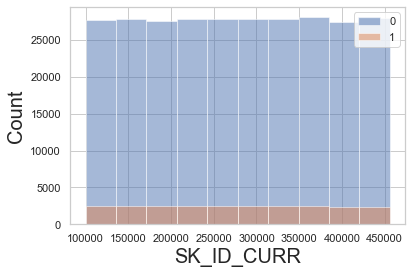

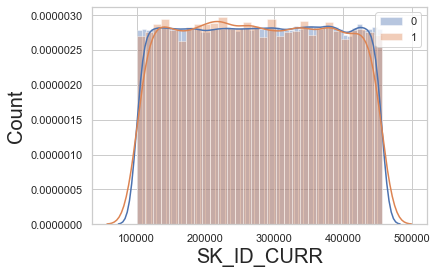

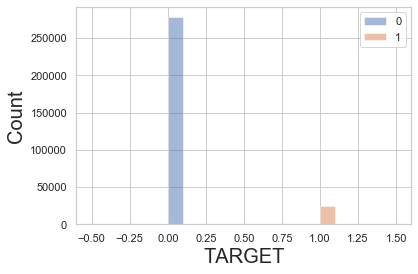

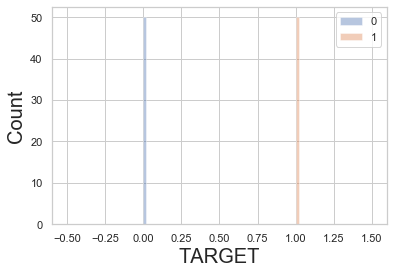

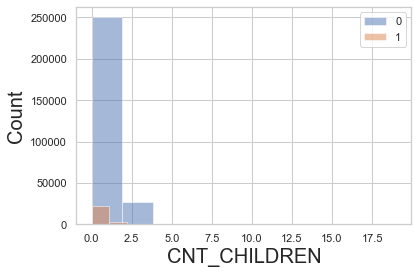

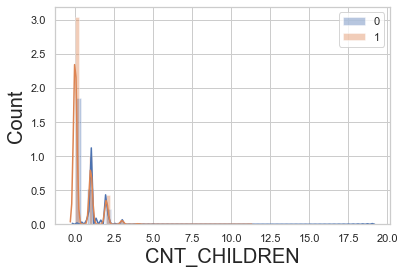

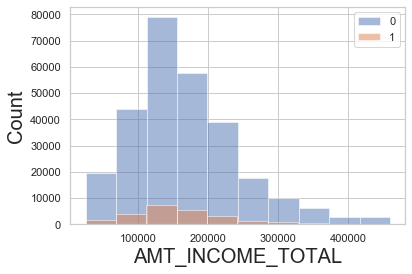

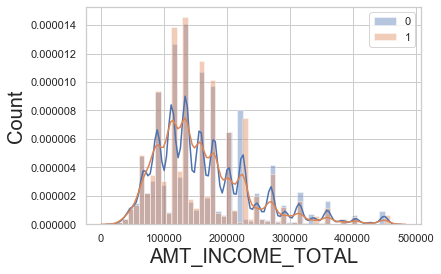

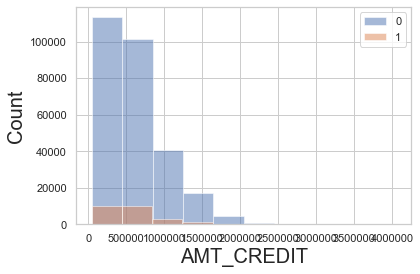

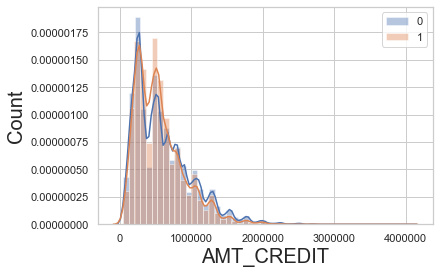

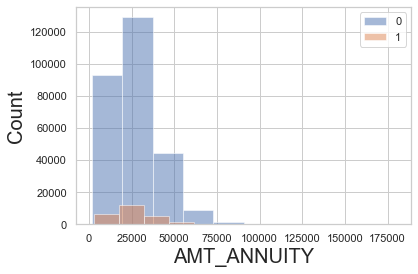

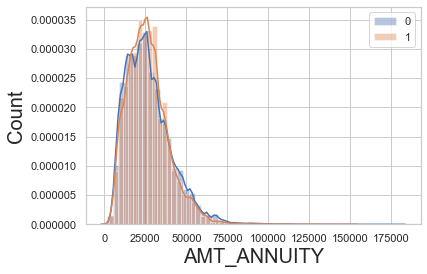

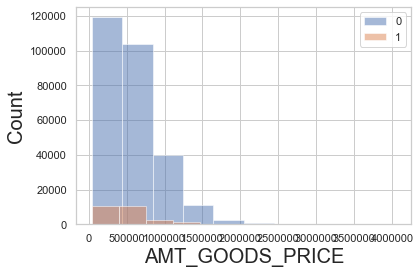

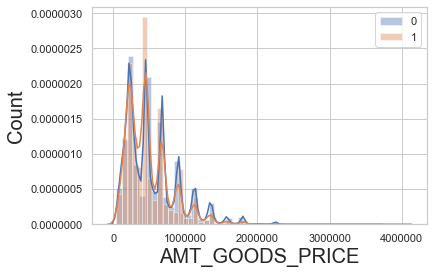

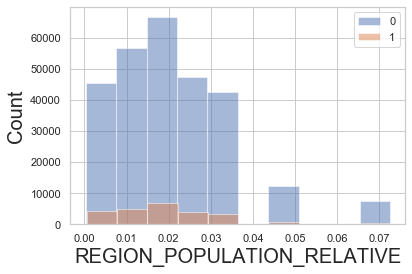

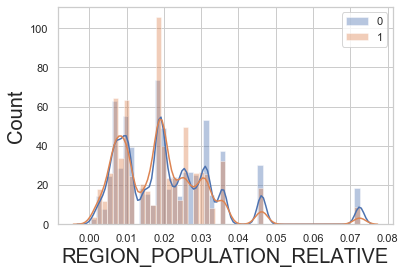

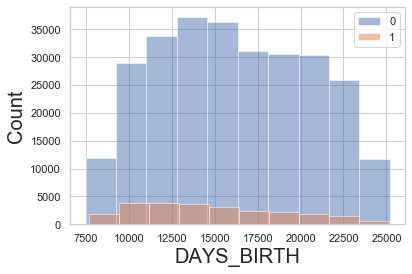

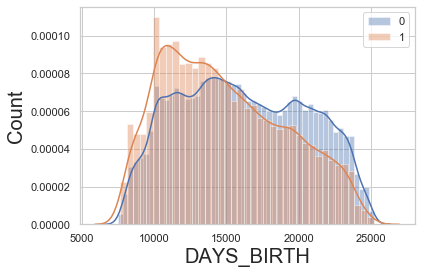

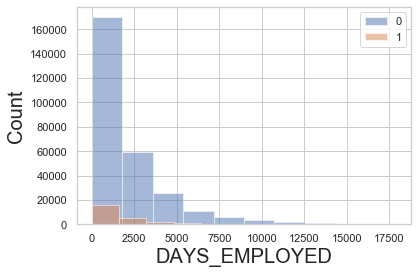

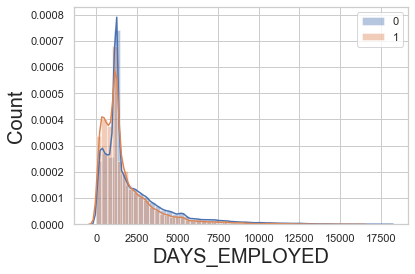

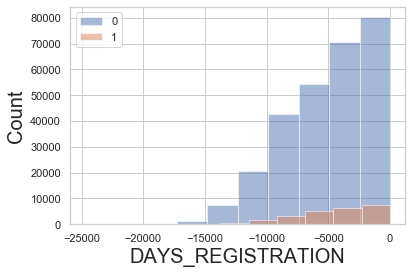

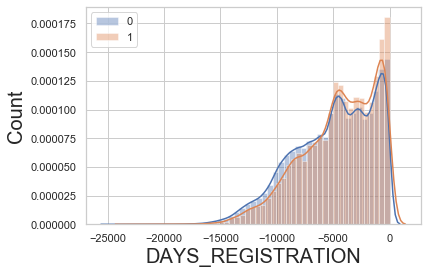

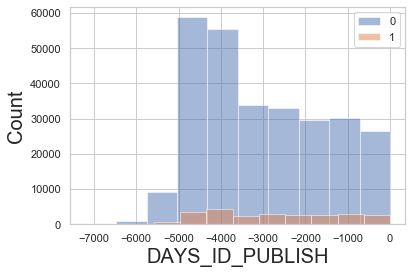

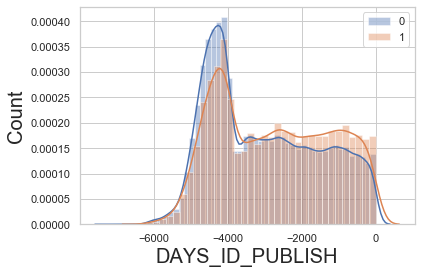

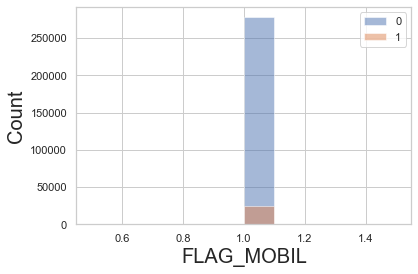

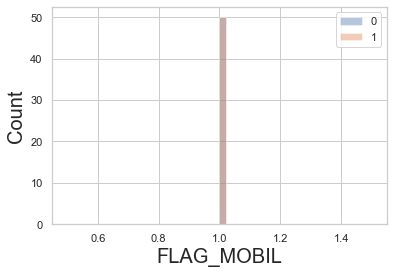

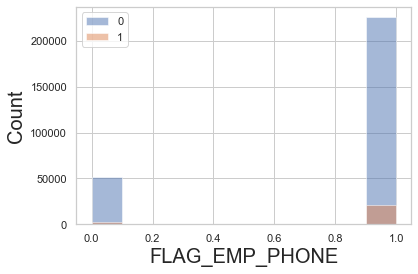

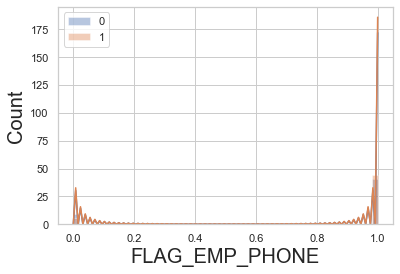

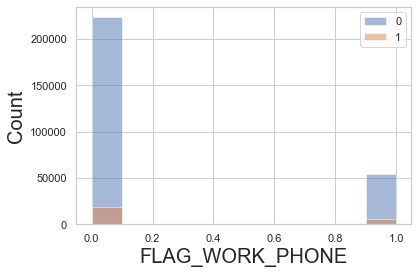

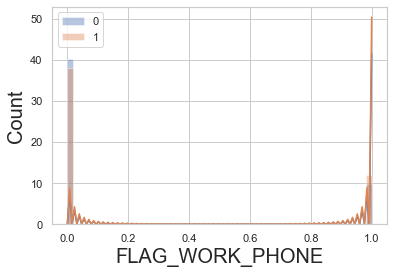

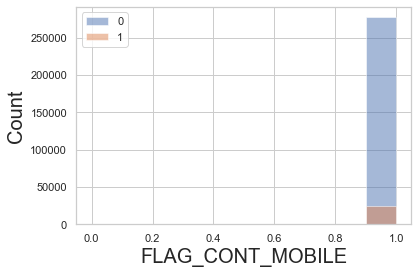

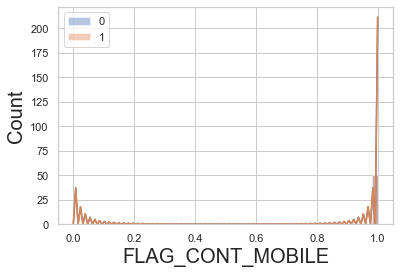

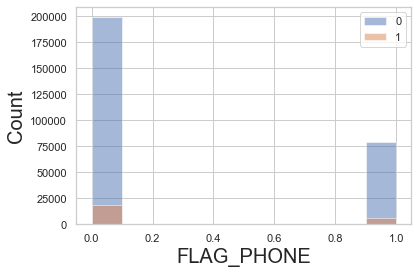

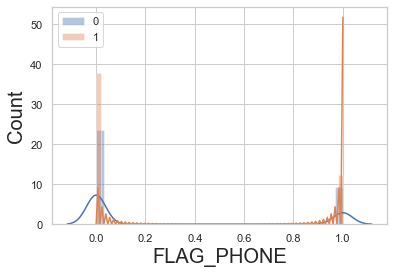

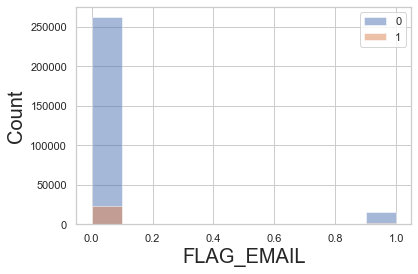

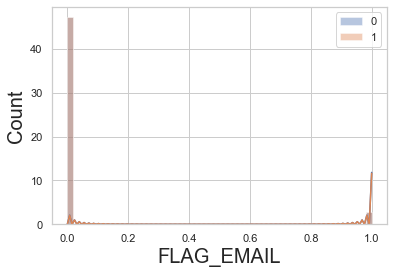

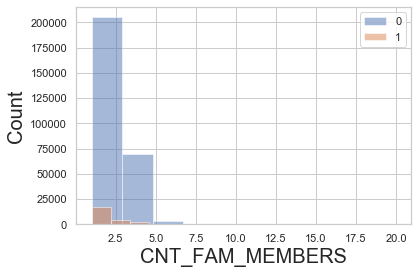

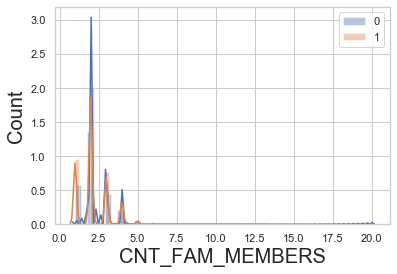

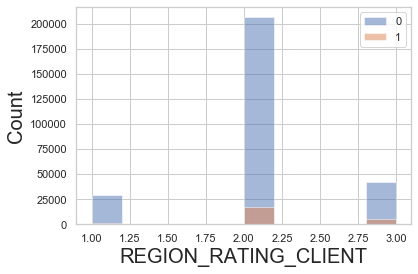

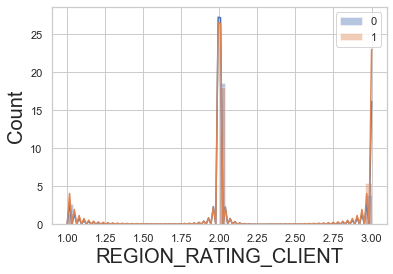

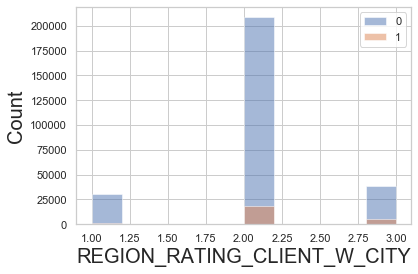

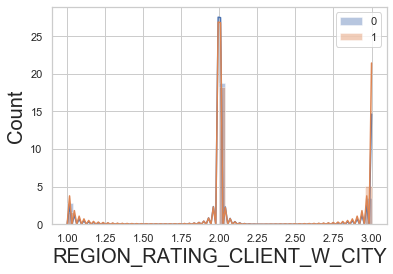

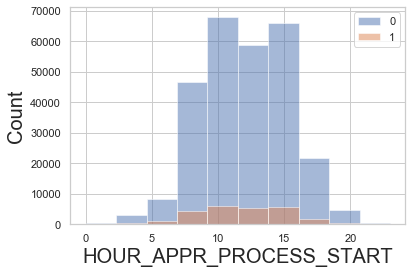

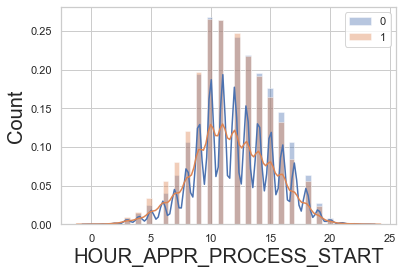

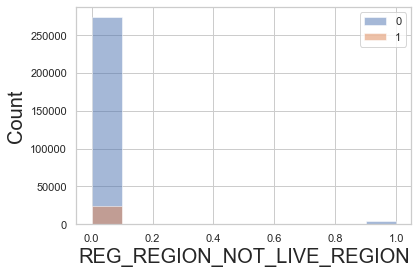

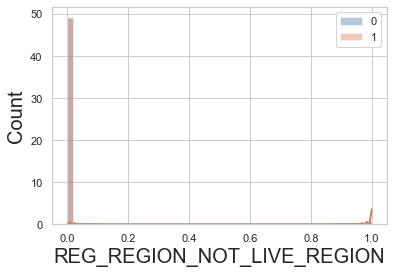

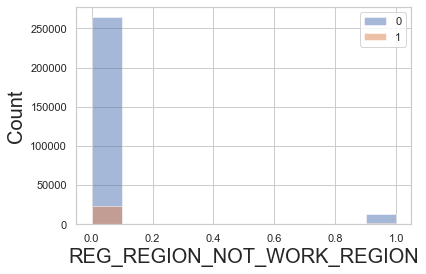

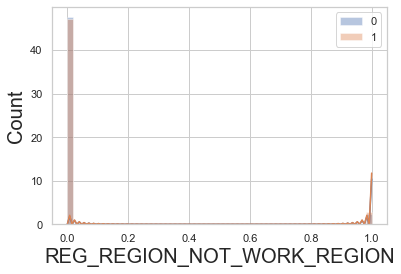

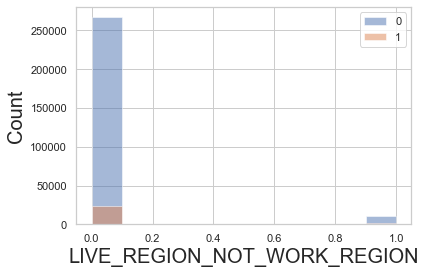

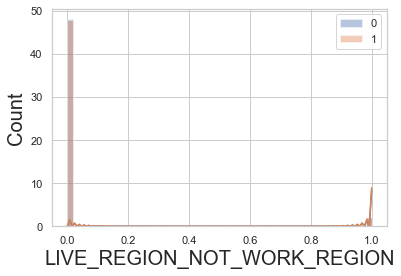

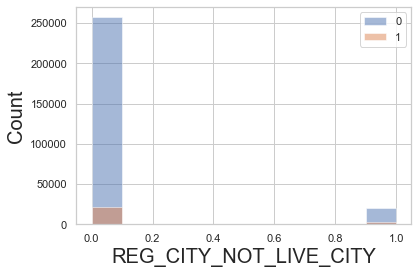

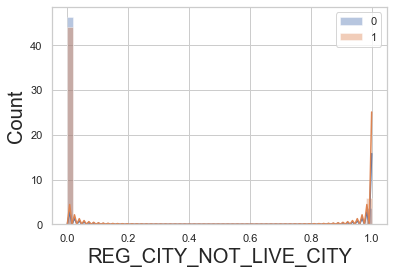

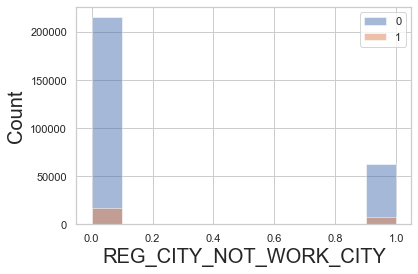

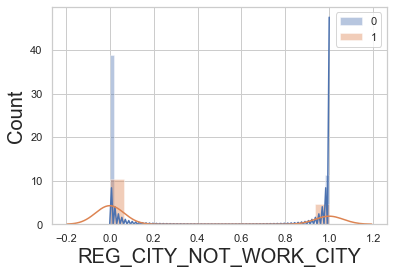

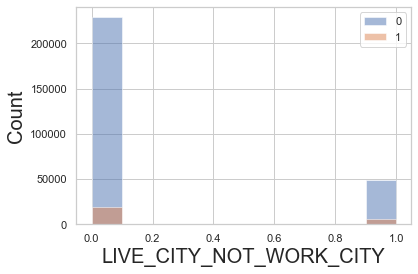

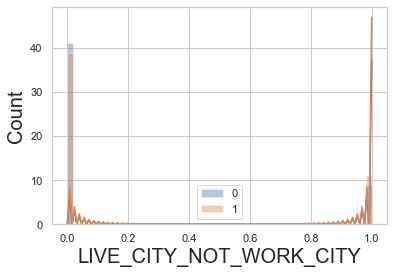

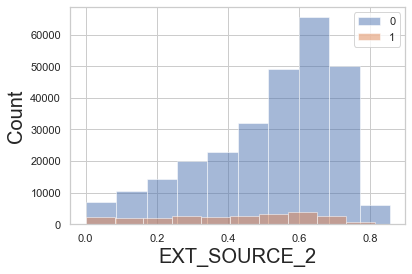

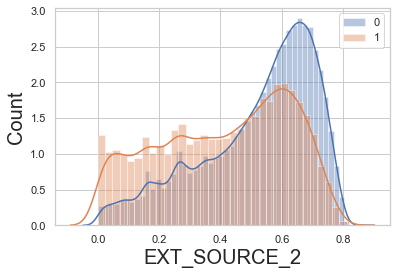

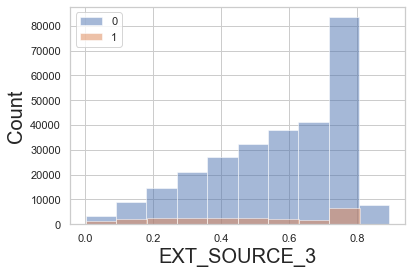

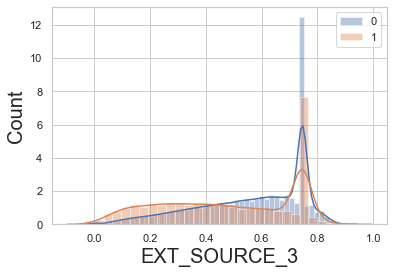

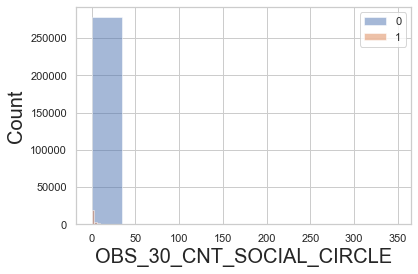

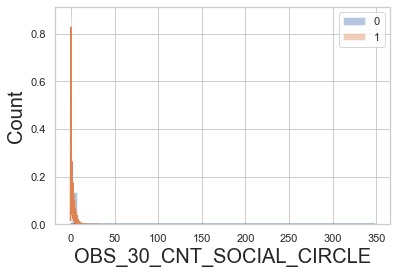

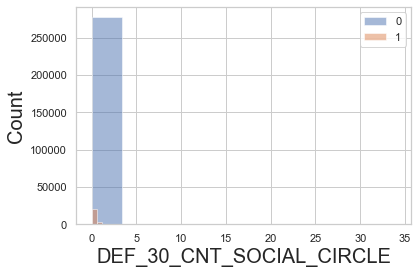

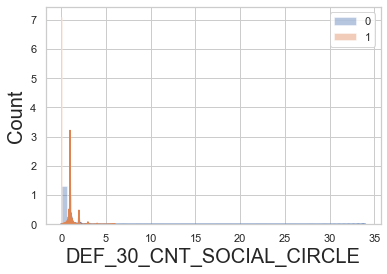

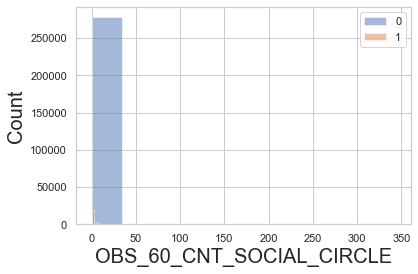

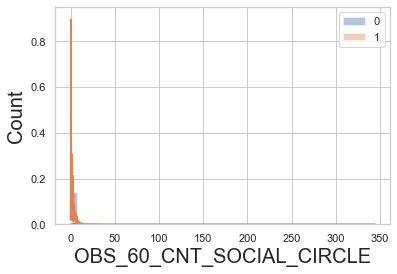

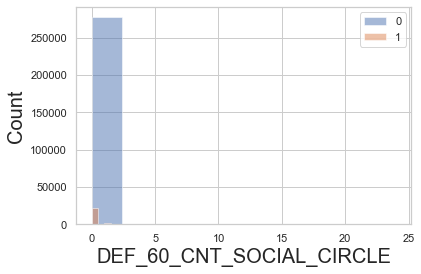

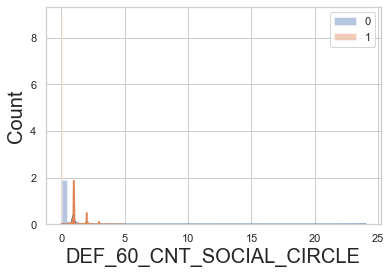

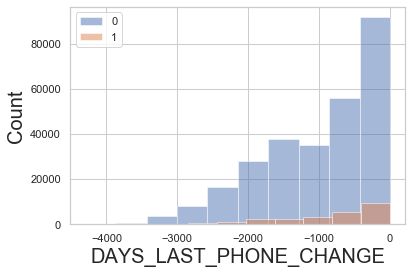

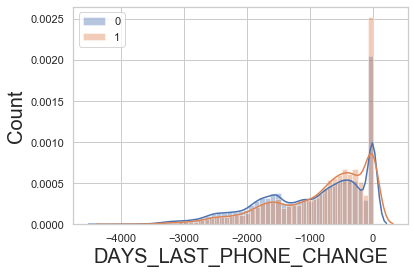

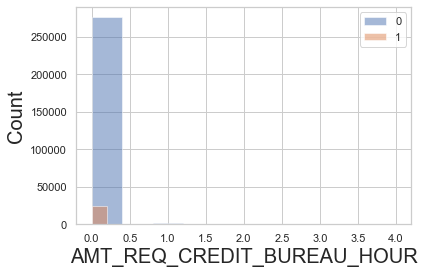

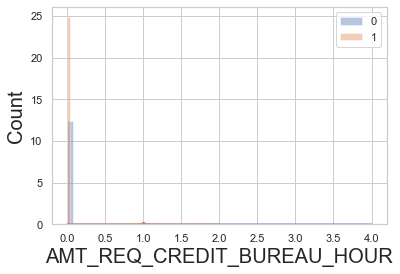

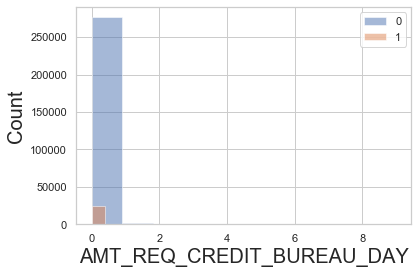

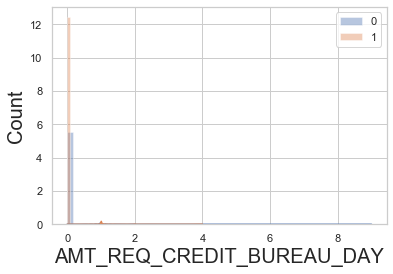

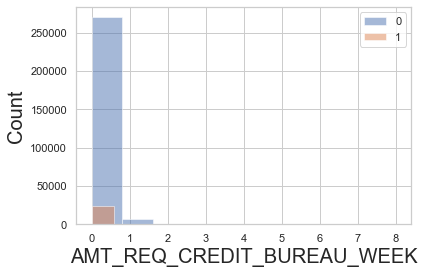

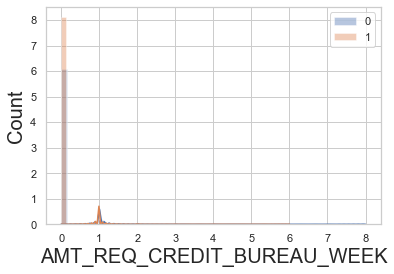

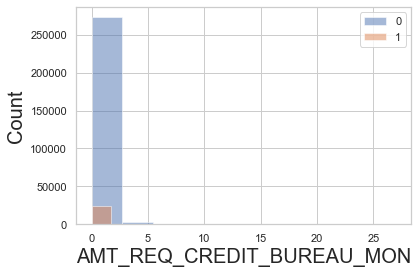

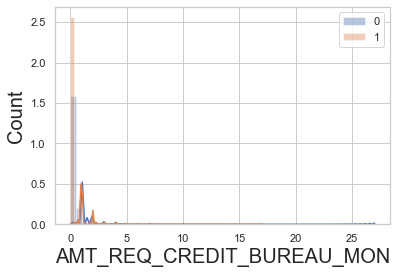

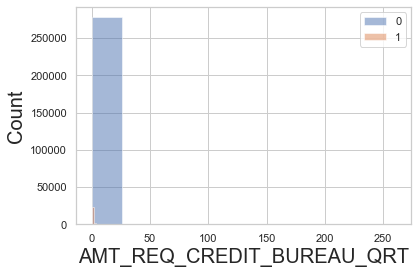

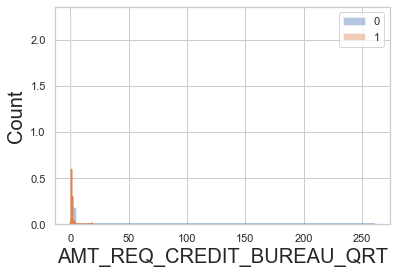

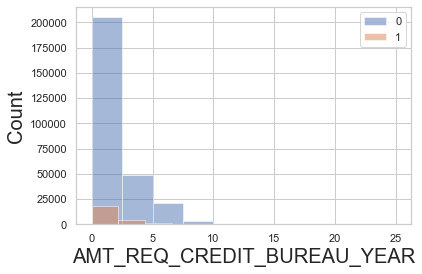

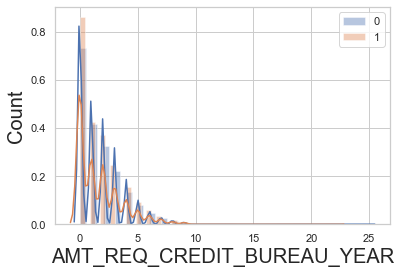

In [122]:
for column in numerical_cols:
    if column in skip_columns:
        continue
    else:
        plt.hist(target_0[column],alpha=0.5,label='0')
        plt.hist(target_1[column],alpha=0.5,label='1')
        plt.xlabel(str(column))
        plt.ylabel('Count')
        plt.legend()
        plt.show()
        sns.distplot(target_0[column], label='0', kde=True)
        sns.distplot(target_1[column], label='1',kde=True)
        plt.xlabel(str(column))
        plt.ylabel('Count')
        plt.legend()
        plt.savefig('Univariate Analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        print()

### Box plot Between Income and Education Status for target 0 and target 1 

#### For Target 0 

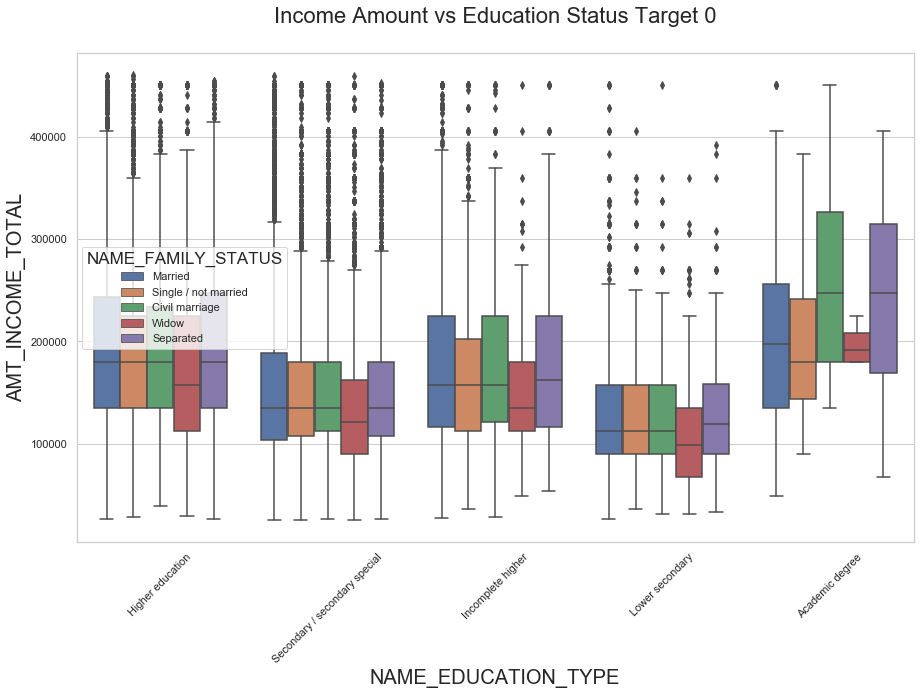

In [134]:
plt.figure(figsize=(15,9))
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income Amount vs Education Status Target 0')
plt.xticks(rotation=45)
plt.savefig('Income Amount vs Education Status.png.png', dpi=300, bbox_inches='tight')
plt.show()

#### For target 1

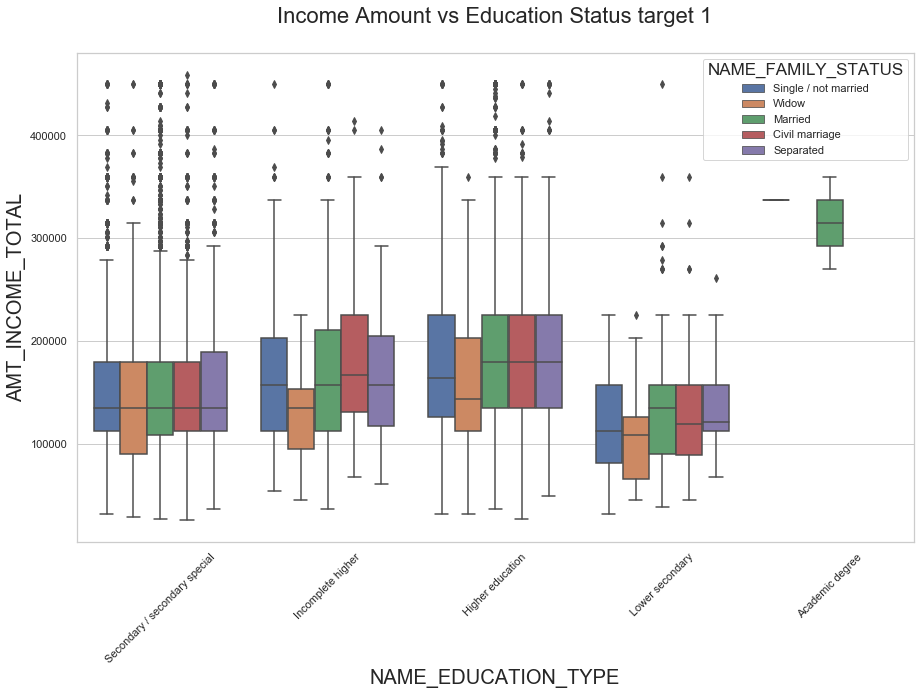

In [135]:
plt.figure(figsize=(15,9))
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income Amount vs Education Status target 1')
plt.xticks(rotation=45)
plt.savefig('Income Amount vs Education Status.png', dpi=300, bbox_inches='tight')
plt.show()

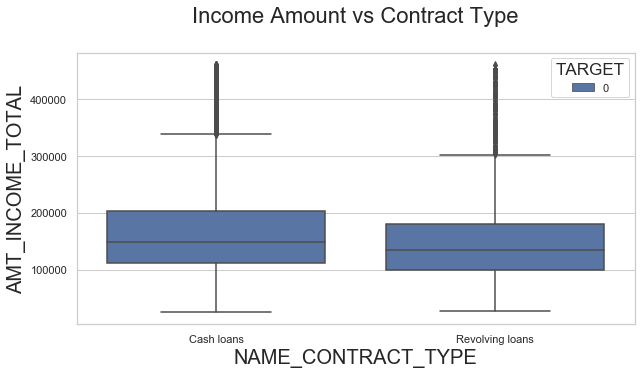

In [136]:
plt.figure(figsize=(10,5))
sns.boxplot(data =target0, x='NAME_CONTRACT_TYPE',y='AMT_INCOME_TOTAL', hue ='TARGET',orient='v')
plt.title('Income Amount vs Contract Type')
plt.savefig('Income Amount vs Contract Type0.png', dpi=300, bbox_inches='tight')
plt.show()

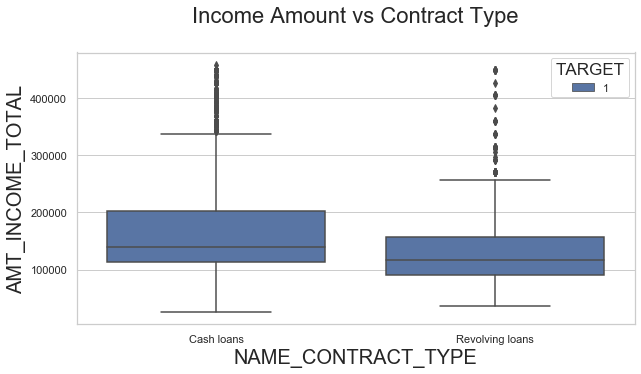

In [137]:
plt.figure(figsize=(10,5))
sns.boxplot(data =target1, x='NAME_CONTRACT_TYPE',y='AMT_INCOME_TOTAL', hue ='TARGET',orient='v')
plt.title('Income Amount vs Contract Type')
plt.savefig('Income Amount vs Contract Type1.png', dpi=300, bbox_inches='tight')
# plt.xticks(rotation=45)
plt.show()

## Adding "Previous Data" frame in "Application Data"

In [107]:
prev_app_data_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0          17145.0                   SATURDAY                       15                           Y                       1                    XAP             Approved            -73  Cash through the bank                XAP         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0         607500.0                   THURSDAY                       11                           Y                       1                    XNA             Approved           -164                    XNA                XAP         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5         112500.0                    TUESDAY                       11                           Y                       1                    XNA             Approved           -301  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0         450000.0                     MONDAY                        7                           Y                       1                    XNA             Approved           -512  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0         337500.0                   THURSDAY                        9                           Y                       1                Repairs              Refused           -781  Cash through the bank                 HC         Repeater                 XNA           Cash           walk-in  Credit and cash offices                -1                  XNA         24.0             high         Cash Street: high

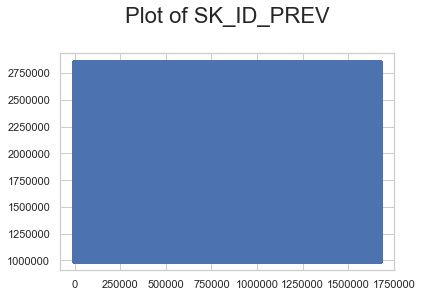

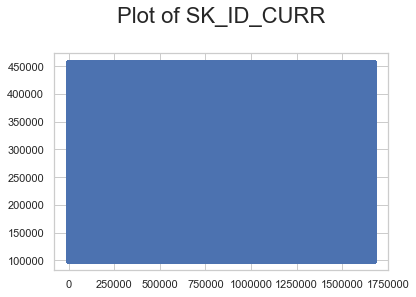

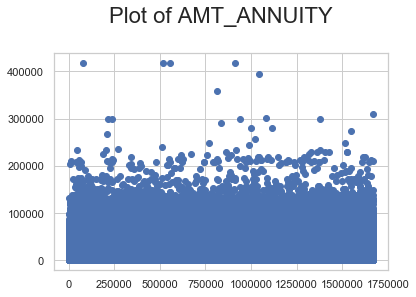

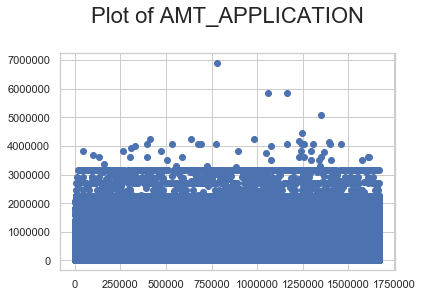

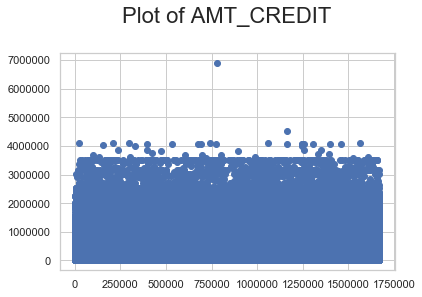

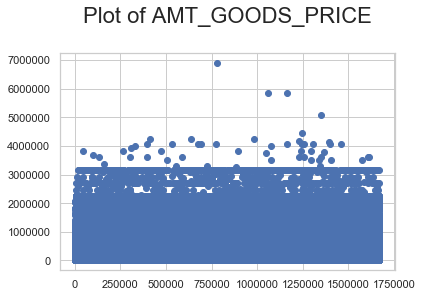

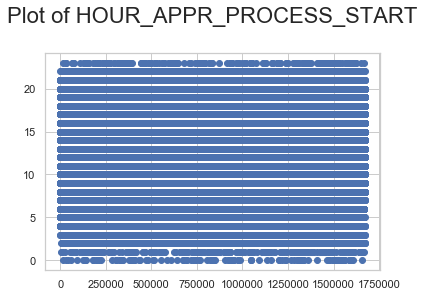

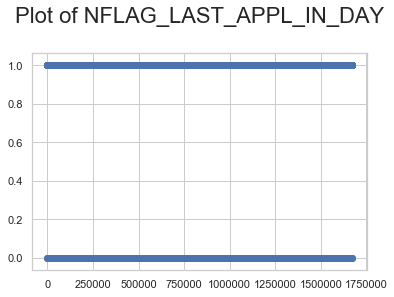

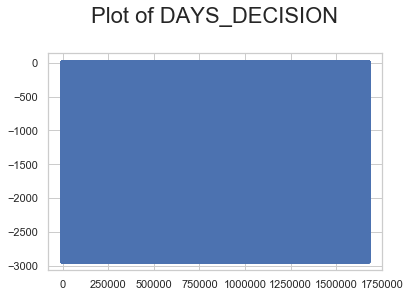

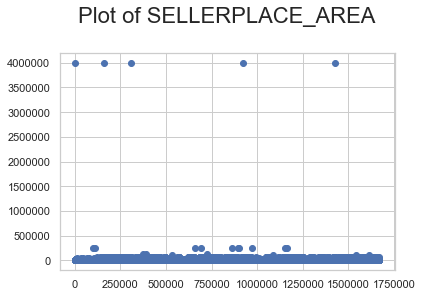

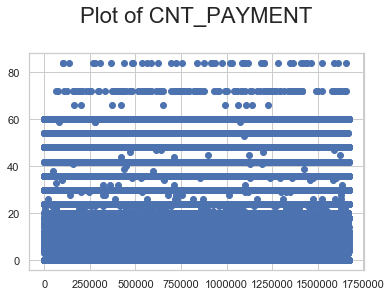

In [108]:
prev_app_data_df.shape

# prev_app_data_df[prev_app_data_df['NAME_CASH_LOAN_PURPOSE']=='XNA']

# plt.figure(figsize=(10,8))
# plt.scatter(x='AMT_ANNUITY',y='NAME_CASH_LOAN_PURPOSE',data=prev_app_data_df)

numerical_cols_prev = prev_app_data_df.select_dtypes(include=['int64','float64']).columns
numerical_cols_prev

for col in numerical_cols_prev:
    sns.set_style('whitegrid')
    plt.scatter(prev_app_data_df.index, prev_app_data_df[col])
    plt.title("Plot of "+ col)
    plt.show();

In [109]:
prev_app_data_df_sample=prev_app_data_df.sample(25000)
prev_app_data_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0          17145.0                   SATURDAY                       15                           Y                       1                    XAP             Approved            -73  Cash through the bank                XAP         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0         607500.0                   THURSDAY                       11                           Y                       1                    XNA             Approved           -164                    XNA                XAP         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5         112500.0                    TUESDAY                       11                           Y                       1                    XNA             Approved           -301  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0         450000.0                     MONDAY                        7                           Y                       1                    XNA             Approved           -512  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0         337500.0                   THURSDAY                        9                           Y                       1                Repairs              Refused           -781  Cash through the bank                 HC         Repeater                 XNA           Cash           walk-in  Credit and cash offices                -1                  XNA         24.0             high         Cash Street: high

In [110]:
prev_app_data_df.shape

(1670214, 26)

In [111]:
prev_app_data_df1 = prev_app_data_df
prev_app_data_df.shape

(1670214, 26)

In [112]:
previous_train = app_data_df.merge(prev_app_data_df,left_on='SK_ID_CURR',right_on='SK_ID_CURR',how='inner')

In [113]:
train_0 = app_data_df.loc[app_data_df['TARGET']==0]
train_1 = app_data_df.loc[app_data_df['TARGET']==1]

In [114]:
ptrain_0 = previous_train.loc[previous_train['TARGET']==0]
ptrain_1 = previous_train.loc[previous_train['TARGET']==1]

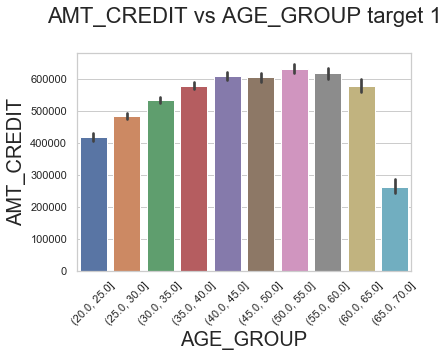

In [142]:
sns.barplot(y=train_1.AMT_CREDIT,x=train_1.AGE_GROUP)
plt.xticks(rotation=45)
plt.title('AMT_CREDIT vs AGE_GROUP target 1')
plt.show()

In [123]:
%pwd

'C:\\Users\\sharhars\\Desktop\\extracurricular\\UpGrad DS\\EDA Case study'